In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Mon Dec 19 12:35:03 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P0    28W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
from datetime import datetime
import os
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from scipy import sparse
from scipy.sparse import csc_matrix
from sklearn.decomposition import TruncatedSVD

np.random.seed(0)

### Setup and Load dataset

In [ ]:

import pandas as pd
import os
from os.path import exists
import zipfile
import numpy as np

In [ ]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install gdown
!pip uninstall scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Found existing installation: scikit-surprise 1.1.3
Uninstalling scikit-surprise-1.1.3:
  Would remove:
    /usr/local/bin/surprise
    /usr/local/lib/python3.8/dist-packages/scikit_surprise-1.1.3.dist-info/*
    /usr/local/lib/python3.8/dist-packages/surprise/*
Proceed (y/n)? y
  Successfully uninstalled scikit-surprise-1.1.3


In [ ]:
!gdown https://drive.google.com/uc?id=1wvQW5W2t5to-_eN0bu3eOqXIqz3NDXKH


Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1wvQW5W2t5to-_eN0bu3eOqXIqz3NDXKH 



### Setup

In [ ]:

import pandas as pd
import os
from os.path import exists
import zipfile
import numpy as np

In [ ]:
!pip install gdown
!pip install scikit-surprise
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit_surprise-1.1.3-cp38-cp38-linux_x86_64.whl
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit_learn-1.2.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.7 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
recommenders 1.1.1 requires scikit-learn<1.0.3,>=0.22.1, but you have scikit-learn 1.2.0 which is incompatible.


In [ ]:
!gdown https://drive.google.com/uc?id=1kl65YOvoSAMSgszQQbua2q4Zwe1HgPct

Downloading...
From: https://drive.google.com/uc?id=1kl65YOvoSAMSgszQQbua2q4Zwe1HgPct
To: /content/data.zip
100% 4.16M/4.16M [00:00<00:00, 305MB/s]


In [ ]:
!unzip -o "data.zip"  -d  "/content"

Archive:  data.zip
  inflating: /content/amazon_min.csv  
  inflating: /content/book_min.csv   
  inflating: /content/ciao_min.csv   
  inflating: /content/ecom_min.csv   
  inflating: /content/food_min.csv   
  inflating: /content/movies_min.csv  


In [ ]:

movie_10k_df = pd.read_csv("movies_min.csv")
amazon_df =pd.read_csv('amazon_min.csv')
book_df=pd.read_csv("book_min.csv")
food_df = pd.read_csv('food_min.csv')
ecommerce_df=pd.read_csv('ecom_min.csv')
ciao_df=pd.read_csv('ciao_min.csv')

# Details about dataset

In [ ]:
summary_df=pd.DataFrame(columns=['Dataset','Algorithm','Sparsity','Precision@k'])

In [ ]:
userID="userID"
itemID="itemID"
score="rating"
timestamp='time'

# Sparsity 

In [ ]:
from scipy.sparse import csr_matrix
def checkSparsity(main_df):
   
    # pivot_df = main_df.pivot_table(
    #     index='itemID',
    #     columns='userID',
    #     values='rating'
    # )
    totalUsers=main_df.userID.unique().shape[0]
    totalitems= main_df.itemID.unique().shape[0]
    total=totalUsers*totalitems
    totalreconds=main_df.shape[0]
    sparsity=(total-totalreconds)/total
    return sparsity

In [ ]:

sparsity_food=checkSparsity(food_df)
sparsity_food

0.9758585086369416

In [ ]:
sparsity_amazon=checkSparsity(amazon_df)
sparsity_amazon

0.9919133172746379

In [ ]:

sparsity_movielens=checkSparsity(movie_10k_df)
sparsity_movielens

0.900792867888234

In [ ]:
sparsity_ecom=checkSparsity(ecommerce_df)
sparsity_ecom

0.9994459394919134

<!-- Observations :
1. Very sparse dataset sparsity 0.98
2. Many items and users in the dataset has less interaction data -->

<!-- ### Divide dataset based on following:
- All users rated very few items - will use contant based filtering method.To get threshold value for filtering we first find median of number of rating given by each users.Next choose value less then that median value such that we decrese sparsity as much as possible(less then .95)
- For other data we will go with collaborative filtering or other deep learning methods -->

In [ ]:
sparsity_book=checkSparsity(book_df)
sparsity_book

0.9911869365436147

In [ ]:
sparsity_ciao=checkSparsity(ciao_df)
sparsity_ciao

0.9914865451250656

In [ ]:
# movie_10k_df['rating']=1
# amazon_df['rating']=1
# book_df['rating']=1
# food_df['rating']=1
# ciao_df['rating']=1
# ecommerce_df['rating']=1

# Factorization machine

In [ ]:
!pip install rankfm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from rankfm.rankfm import RankFM
from rankfm.evaluation import hit_rate, reciprocal_rank, discounted_cumulative_gain, precision, recall, diversity
from datetime import datetime


In [ ]:
EPOCHS=50
MAX_SAMPLES=30
ALPHA=0.01
SIGMA=0.1
LR=0.10
LOSS='warp'
FACTORS=20

In [ ]:
FMUSER='user_id'
FMITEM='item_id'

In [ ]:
class FactMachineExplicit:
  def setup(self,fm_df):
    self.valid_recommendations= None
    fm_df['random'] = np.random.random(size=len(fm_df))
    test_pct = 0.25
    train_mask = fm_df['random'] <  (1 - test_pct)
    valid_mask = fm_df['random'] >= (1 - test_pct)
    self.interactions_train = fm_df[train_mask].groupby([FMUSER, FMITEM]).mean().reset_index()
    self.interactions_valid = fm_df[valid_mask].groupby([FMUSER, FMITEM]).mean().reset_index()
 
   
    self.weight_train = np.log2(self.interactions_train[RATING] + 1)
    self.weight_valid =  np.log2(self.interactions_valid[RATING] + 1)

    self.interactions_train=self.interactions_train[[FMUSER, FMITEM]]
    self.interactions_valid=self.interactions_valid[[FMUSER, FMITEM]]
    self.train_users = np.sort(self.interactions_train[FMUSER].unique())
    self.valid_users = np.sort(self.interactions_valid[FMUSER].unique())
    cold_start_users = set(self.valid_users) - set(self.train_users)
    self.train_items = np.sort(self.interactions_train[FMITEM].unique())
    self.valid_items = np.sort(self.interactions_valid[FMITEM].unique())
    cold_start_items = set(self.valid_items) - set(self.train_items)
    
    print("train shape: {}".format(self.interactions_train.shape))
    print("valid shape: {}".format(self.interactions_valid.shape))

    print("train users: {}".format(len(self.train_users)))
    print("valid users: {}".format(len(self.valid_users)))
    print("cold-start users: {}".format(cold_start_users))

    print("train items: {}".format(len(self.train_items)))
    print("valid items: {}".format(len(self.valid_items)))
    print("cold-start items: {}".format(cold_start_items))
    self.user_features_train=None
    self.user_features_valid=None
    self.item_features_train=None
    self.item_features_valid=None

     
    self.model = RankFM(factors=FACTORS, loss=LOSS, max_samples=MAX_SAMPLES, alpha=ALPHA, sigma=SIGMA, learning_rate=LR, learning_schedule='invscaling')

  def train(self):
    #print(self.item_features_train.columns[0])
    before= datetime.now()
    # if self.item_features_train is not None and self.user_features_train is not None:
    #   self.model.fit(self.interactions_train,item_features=self.item_features_train,user_features=self.user_features_train, epochs=20, verbose=True)
    # if self.item_features_train is  None and self.user_features_train is not None:
    #   self.model.fit(self.interactions_train,user_features=self.user_features_train, epochs=EPOCHS, verbose=True)
 
    # if self.item_features_train is not None and self.user_features_train is  None:
    #   self.model.fit(self.interactions_train,sample_weight=self.weight_train,item_features=self.item_features_train, epochs=EPOCHS, verbose=True)
    # if self.item_features_train is  None and self.user_features_train is  None:
    self.model.fit(self.interactions_train,sample_weight=self.weight_train, epochs=EPOCHS, verbose=False)
 
    after= datetime.now()
    self.duration = after-before 
  def evaluate(self,k):
    if self.valid_recommendations is None:
      self.valid_recommendations = self.model.recommend(self.valid_users, n_items=10, filter_previous=True, cold_start='nan')
    self.model_hit_rate = hit_rate(self.model, self.interactions_valid, k=k)
    self.model_reciprocal_rank = reciprocal_rank(self.model, self.interactions_valid, k=k)
    self.model_dcg = discounted_cumulative_gain(self.model, self.interactions_valid, k=k)
    self.model_precision = precision(self.model, self.interactions_valid, k=k)
    self.model_recall = recall(self.model, self.interactions_valid, k=k)
    print("hit_rate: {:.3f}".format(self.model_hit_rate))
    print("reciprocal_rank: {:.3f}".format(self.model_reciprocal_rank))
    print("dcg: {:.3f}".format(self.model_dcg, 3))
    print("precision: {:.3f}".format(self.model_precision))
    print("recall: {:.3f}".format(self.model_recall))
    return self.model_recall,self.model_precision,self.model_hit_rate,self.duration.total_seconds()



In [ ]:
USER="userID"
ITEM="itemID"
RATING="rating"
TOP_K=10

In [ ]:
fm_df=amazon_df.copy()

FMUSER='user_id'
FMITEM='item_id'
fm_df.rename(columns = {USER:FMUSER, ITEM:FMITEM}, inplace = True)
fm_df=fm_df[[FMUSER,FMITEM,RATING]]
fm=FactMachineExplicit()
fm.setup(fm_df)
fm.train()
fm_testrecall,fm_testprecesion,hit,fm_duration=fm.evaluate(TOP_K)


train shape: (49761, 2)
valid shape: (16388, 2)
train users: 2944
valid users: 2818
cold-start users: {'A2VWHEZTQQU1U9', 'A2CL818RN52NWN', 'A3VIFJZC7SHX1T', 'A1RCGK44YXNBBB', 'A2MKG8P7L2PPPB', 'A2YGEJTOPY4DV9', 'A2BGZ52M908MJY', 'A24W1A0CW6CW5R'}
train items: 2771
valid items: 2746
cold-start items: set()
hit_rate: 0.122
reciprocal_rank: 0.038
dcg: 0.061
precision: 0.013
recall: 0.024


In [ ]:
df2 = {'Dataset':"Amazon Product",'Algorithm':"Factorization Machine",'Sparsity':sparsity_amazon,'Recall@K':fm_testrecall,'Precision@k':fm_testprecesion,'HitRate@k':hit}
summary_df = summary_df.append(df2, ignore_index = True)

In [ ]:
fm_df=movie_10k_df.copy()


FMUSER='user_id'
FMITEM='item_id'
fm_df.rename(columns = {USER:FMUSER, ITEM:FMITEM}, inplace = True)
fm_df=fm_df[[FMUSER,FMITEM,RATING]]
fm=FactMachineExplicit()
fm.setup(fm_df)
fm.train()
fm_testrecall,fm_testprecesion,hit,fm_duration=fm.evaluate(TOP_K)


train shape: (72355, 2)
valid shape: (24191, 2)
train users: 943
valid users: 942
cold-start users: set()
train items: 1032
valid items: 1031
cold-start items: set()
hit_rate: 0.577
reciprocal_rank: 0.187
dcg: 0.381
precision: 0.089
recall: 0.065


In [ ]:
df2 = {'Dataset':"MovieLens",'Algorithm':"Factorization Machine",'Sparsity':sparsity_movielens,'Recall@K':fm_testrecall,'Precision@k':fm_testprecesion,'HitRate@k':hit}
summary_df = summary_df.append(df2, ignore_index = True)

In [ ]:
fm_df=food_df.copy()

FMUSER='user_id'
FMITEM='item_id'
fm_df.rename(columns = {USER:FMUSER, ITEM:FMITEM}, inplace = True)
fm_df=fm_df[[FMUSER,FMITEM,RATING]]
fm=FactMachineExplicit()
fm.setup(fm_df)
fm.train()
fm_testrecall,fm_testprecesion,hit,fm_duration=fm.evaluate(TOP_K)


train shape: (54972, 2)
valid shape: (18353, 2)
train users: 1925
valid users: 1878
cold-start users: {154588}
train items: 1577
valid items: 1577
cold-start items: set()
hit_rate: 0.174
reciprocal_rank: 0.056
dcg: 0.094
precision: 0.021
recall: 0.021


In [ ]:
df2 = {'Dataset':"Food.com",'Algorithm':"Factorization Machine",'Sparsity':sparsity_food,'Recall@K':fm_testrecall,'Precision@k':fm_testprecesion,'HitRate@k':hit}
summary_df = summary_df.append(df2, ignore_index = True)

In [ ]:
fm_df=book_df.copy()
FMUSER='user_id'
FMITEM='item_id'
fm_df.rename(columns = {USER:FMUSER, ITEM:FMITEM}, inplace = True)
fm_df=fm_df[[FMUSER,FMITEM,RATING]]
fm=FactMachineExplicit()
fm.setup(fm_df)
fm.train()
fm_testrecall,fm_testprecesion,hit,fm_duration=fm.evaluate(TOP_K)


train shape: (35296, 2)
valid shape: (11637, 2)
train users: 1498
valid users: 1493
cold-start users: set()
train items: 3538
valid items: 3172
cold-start items: {'0151006903', '349913599X', '0060508302', '0061030430', '3423201509', '8420441708', '1550544683', '0440226686', '0156904365', '0671000314', '0140620109', '3453071174', '8495618605', '3442433495', '1844262553', '3442413338', '344244392X'}
hit_rate: 0.126
reciprocal_rank: 0.045
dcg: 0.071
precision: 0.015
recall: 0.024


In [ ]:
df2 = {'Dataset':"Book Dataset",'Algorithm':"Factorization Machine",'Sparsity':sparsity_book,'Recall@K':fm_testrecall,'Precision@k':fm_testprecesion,'HitRate@k':hit}
summary_df = summary_df.append(df2, ignore_index = True)

In [ ]:
summary_df

,Dataset,Algorithm,Sparsity,Precision@k,HitRate@k,Recall@K
0,Amazon Product,Factorization Machine,0.991913,0.013203,0.122064,0.023967
1,MovieLens,Factorization Machine,0.900793,0.088747,0.577495,0.065411
2,Food.com,Factorization Machine,0.975859,0.020511,0.174214,0.021399
3,Book Dataset,Factorization Machine,0.991187,0.014668,0.125921,0.024001


In [ ]:
fm_df=ciao_df.copy()
FMUSER='user_id'
FMITEM='item_id'
fm_df.rename(columns = {USER:FMUSER, ITEM:FMITEM}, inplace = True)
fm_df=fm_df[[FMUSER,FMITEM,RATING]]
fm=FactMachineExplicit()
fm.setup(fm_df)
fm.train()
fm_testrecall,fm_testprecesion,hit,fm_duration=fm.evaluate(TOP_K)


train shape: (56730, 2)
valid shape: (18870, 2)
train users: 2037
valid users: 2024
cold-start users: set()
train items: 4389
valid items: 4078
cold-start items: {14949, 14852, 76597, 41350}
hit_rate: 0.295
reciprocal_rank: 0.108
dcg: 0.191
precision: 0.040
recall: 0.052


In [ ]:
df2 = {'Dataset':"Ciao",'Algorithm':"Factorization Machine",'Sparsity':sparsity_book,'Recall@K':fm_testrecall,'Precision@k':fm_testprecesion,'HitRate@k':hit}
summary_df = summary_df.append(df2, ignore_index = True)

In [ ]:
summary_df

,Dataset,Algorithm,Sparsity,Precision@k,HitRate@k,Recall@K
0,Amazon Product,Factorization Machine,0.991913,0.013203,0.122064,0.023967
1,MovieLens,Factorization Machine,0.900793,0.088747,0.577495,0.065411
2,Food.com,Factorization Machine,0.975859,0.020511,0.174214,0.021399
3,Book Dataset,Factorization Machine,0.991187,0.014668,0.125921,0.024001
4,Ciao,Factorization Machine,0.991187,0.040464,0.295455,0.052317


# RBM

In [ ]:
!pip install recommenders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit_learn-1.0.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.0
    Uninstalling scikit-learn-1.2.0:
      Successfully uninstalled scikit-learn-1.2.0


In [ ]:

from recommenders.datasets.python_splitters import python_random_split,  python_stratified_split

from recommenders.evaluation.python_evaluation import map_at_k, ndcg_at_k, precision_at_k, recall_at_k
from recommenders.models.cornac.cornac_utils import predict_ranking
from recommenders.utils.timer import Timer
from recommenders.utils.constants import SEED


In [ ]:
import torch
import cornac

In [ ]:

from recommenders.models.rbm.rbm import RBM
from recommenders.datasets.python_splitters import numpy_stratified_split
from recommenders.datasets.sparse import AffinityMatrix
from recommenders.datasets import movielens
from recommenders.evaluation.python_evaluation import map_at_k, ndcg_at_k, precision_at_k, recall_at_k
from recommenders.utils.timer import Timer
from recommenders.utils.plot import line_graph

In [ ]:
rating_df=movie_10k_df.copy()


In [ ]:
item_ids = list(set(list(rating_df.itemID.unique())))
user_ids = list(set(list(rating_df.userID.unique())))

In [ ]:
dict_users = {}
index = 0
for ids in sorted(user_ids):
    dict_users[ids] = index
    index += 1
dict_items = {}
index = 0
for ids in sorted(item_ids):
    dict_items[ids] = index
    index += 1

In [ ]:
rating_df['userID'] = rating_df.userID.map(dict_users)
rating_df['itemID'] = rating_df.itemID.map(dict_items)

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# rating_df[['rating']] = scaler.fit_transform(rating_df[['rating']])

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


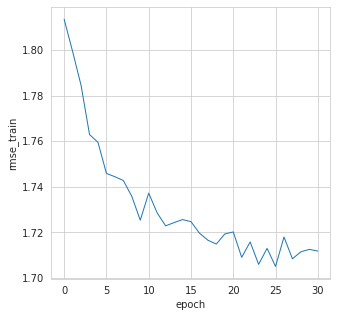

In [ ]:
header = {
        "col_user": "userID",
        "col_item": "itemID",
        "col_rating": "rating",
    }

#instantiate the sparse matrix generation  
am = AffinityMatrix(df =rating_df, **header)

#obtain the sparse matrix 
X, _, _ = am.gen_affinity_matrix()
Xtr, Xtst = numpy_stratified_split(X)
#First we initialize the model class
model = RBM(
    possible_ratings=np.setdiff1d(np.unique(Xtr), np.array([0])),
    visible_units=Xtr.shape[1],
    hidden_units=600,
    training_epoch=30,
    minibatch_size=60,
    keep_prob=0.8,
    with_metrics=True
)
# Model Fit
model.fit(Xtr)

# Plot the train RMSE as a function of the epochs
line_graph(values=model.rmse_train, labels='train', x_name='epoch', y_name='rmse_train')


In [ ]:
top_k =  model.recommend_k_items(Xtst)
top_k_df = am.map_back_sparse(top_k, kind = 'prediction')
test_df = am.map_back_sparse(Xtst, kind = 'ratings')

In [ ]:
eval_precision = precision_at_k(test_df, top_k_df, col_user="userID", col_item="itemID", 
                               col_rating="rating", col_prediction="prediction", 
                               relevancy_method="top_k", k= 20)

In [ ]:
eval_recall = recall_at_k(test_df, top_k_df, col_user="userID", col_item="itemID", 
                          col_rating="rating", col_prediction="prediction", 
                          relevancy_method="top_k", k= 20)


In [ ]:
eval_precision

0.2988865323435843

In [ ]:
df2 = {'Dataset':"MovieLens",'Algorithm':"RBM",'Sparsity':sparsity_movielens,'Precision@k':eval_precision,'Recall@k':eval_recall}
summary_df = summary_df.append(df2, ignore_index = True)

In [ ]:
summary_df

,Dataset,Algorithm,Sparsity,Precision@k,HitRate@k,Recall@K,Recall@k
0,Amazon Product,Factorization Machine,0.991913,0.013203,0.122064,0.023967,NaN
1,MovieLens,Factorization Machine,0.900793,0.088747,0.577495,0.065411,NaN
2,Food.com,Factorization Machine,0.975859,0.020511,0.174214,0.021399,NaN
3,Book Dataset,Factorization Machine,0.991187,0.014668,0.125921,0.024001,NaN
4,Ciao,Factorization Machine,0.991187,0.040464,0.295455,0.052317,NaN
5,MovieLens,RBM,0.900793,0.298887,NaN,NaN,0.373515


In [ ]:
rating_df=food_df.copy()


In [ ]:
item_ids = list(set(list(rating_df.itemID.unique())))
user_ids = list(set(list(rating_df.userID.unique())))

In [ ]:
dict_users = {}
index = 0
for ids in sorted(user_ids):
    dict_users[ids] = index
    index += 1
dict_items = {}
index = 0
for ids in sorted(item_ids):
    dict_items[ids] = index
    index += 1

In [ ]:
rating_df['userID'] = rating_df.userID.map(dict_users)
rating_df['itemID'] = rating_df.itemID.map(dict_items)

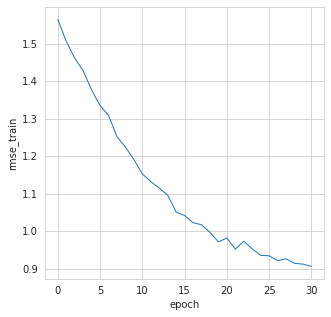

In [ ]:
header = {
        "col_user": "userID",
        "col_item": "itemID",
        "col_rating": "rating",
    }

#instantiate the sparse matrix generation  
am = AffinityMatrix(df =rating_df, **header)

#obtain the sparse matrix 
X, _, _ = am.gen_affinity_matrix()
Xtr, Xtst = numpy_stratified_split(X)
#First we initialize the model class
model = RBM(
    possible_ratings=np.setdiff1d(np.unique(Xtr), np.array([0])),
    visible_units=Xtr.shape[1],
    hidden_units=200,
    training_epoch=30,
    minibatch_size=60,
    keep_prob=0.8,
    with_metrics=True
)
# Model Fit
model.fit(Xtr)

# Plot the train RMSE as a function of the epochs
line_graph(values=model.rmse_train, labels='train', x_name='epoch', y_name='rmse_train')


In [ ]:
top_k =  model.recommend_k_items(Xtst)
top_k_df = am.map_back_sparse(top_k, kind = 'prediction')
test_df = am.map_back_sparse(Xtst, kind = 'ratings')

In [ ]:
eval_precision = precision_at_k(test_df, top_k_df, col_user="userID", col_item="itemID", 
                               col_rating="rating", col_prediction="prediction", 
                               relevancy_method="top_k", k= 20)

In [ ]:
eval_recall = recall_at_k(test_df, top_k_df, col_user="userID", col_item="itemID", 
                          col_rating="rating", col_prediction="prediction", 
                          relevancy_method="top_k", k= 20)


In [ ]:
df2 = {'Dataset':"Food.com",'Algorithm':"RBM",'Sparsity':sparsity_food,'Precision@k':eval_precision,'Recall@k':eval_recall}
summary_df = summary_df.append(df2, ignore_index = True)

In [ ]:
rating_df=amazon_df.copy()


In [ ]:
item_ids = list(set(list(rating_df.itemID.unique())))
user_ids = list(set(list(rating_df.userID.unique())))

In [ ]:
dict_users = {}
index = 0
for ids in sorted(user_ids):
    dict_users[ids] = index
    index += 1
dict_items = {}
index = 0
for ids in sorted(item_ids):
    dict_items[ids] = index
    index += 1

In [ ]:
rating_df['userID'] = rating_df.userID.map(dict_users)
rating_df['itemID'] = rating_df.itemID.map(dict_items)

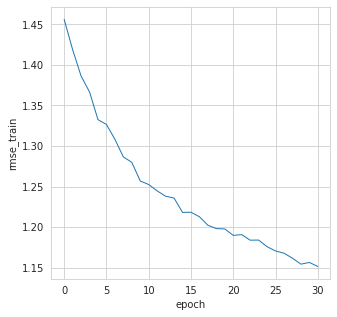

In [ ]:
header = {
        "col_user": "userID",
        "col_item": "itemID",
        "col_rating": "rating",
    }

#instantiate the sparse matrix generation  
am = AffinityMatrix(df =rating_df, **header)

#obtain the sparse matrix 
X, _, _ = am.gen_affinity_matrix()
Xtr, Xtst = numpy_stratified_split(X)
#First we initialize the model class
model = RBM(
    possible_ratings=np.setdiff1d(np.unique(Xtr), np.array([0])),
    visible_units=Xtr.shape[1],
    hidden_units=200,
    training_epoch=30,
    minibatch_size=60,
    keep_prob=0.8,
    with_metrics=True
)
# Model Fit
model.fit(Xtr)

# Plot the train RMSE as a function of the epochs
line_graph(values=model.rmse_train, labels='train', x_name='epoch', y_name='rmse_train')


In [ ]:
top_k =  model.recommend_k_items(Xtst)
top_k_df = am.map_back_sparse(top_k, kind = 'prediction')
test_df = am.map_back_sparse(Xtst, kind = 'ratings')

In [ ]:
eval_precision = precision_at_k(test_df, top_k_df, col_user="userID", col_item="itemID", 
                               col_rating="rating", col_prediction="prediction", 
                               relevancy_method="top_k", k= 20)

In [ ]:
eval_precision

0.06433962264150944

In [ ]:
eval_recall = recall_at_k(test_df, top_k_df, col_user="userID", col_item="itemID", 
                          col_rating="rating", col_prediction="prediction", 
                          relevancy_method="top_k", k= 20)


In [ ]:
df2 = {'Dataset':"Amazon Product",'Algorithm':"RBM",'Sparsity':sparsity_amazon,'Precision@k':eval_precision,'Recall@k':eval_recall}
summary_df = summary_df.append(df2, ignore_index = True)

In [ ]:
summary_df

,Dataset,Algorithm,Sparsity,Precision@k,HitRate@k,Recall@K,Recall@k
0,Amazon Product,Factorization Machine,0.991913,0.013203,0.122064,0.023967,NaN
1,MovieLens,Factorization Machine,0.900793,0.088747,0.577495,0.065411,NaN
2,Food.com,Factorization Machine,0.975859,0.020511,0.174214,0.021399,NaN
3,Book Dataset,Factorization Machine,0.991187,0.014668,0.125921,0.024001,NaN
4,Ciao,Factorization Machine,0.991187,0.040464,0.295455,0.052317,NaN
5,MovieLens,RBM,0.900793,0.298887,NaN,NaN,0.373515
6,Food.com,RBM,0.975859,0.102619,NaN,NaN,0.332255
7,Amazon Product,RBM,0.991913,0.064340,NaN,NaN,0.298161


In [ ]:
rating_df=ciao_df.copy()


In [ ]:
item_ids = list(set(list(rating_df.itemID.unique())))
user_ids = list(set(list(rating_df.userID.unique())))

In [ ]:
dict_users = {}
index = 0
for ids in sorted(user_ids):
    dict_users[ids] = index
    index += 1
dict_items = {}
index = 0
for ids in sorted(item_ids):
    dict_items[ids] = index
    index += 1

In [ ]:
rating_df['userID'] = rating_df.userID.map(dict_users)
rating_df['itemID'] = rating_df.itemID.map(dict_items)

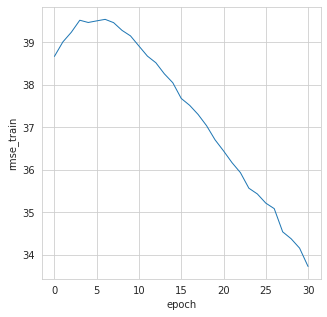

In [ ]:
header = {
        "col_user": "userID",
        "col_item": "itemID",
        "col_rating": "rating",
    }

#instantiate the sparse matrix generation  
am = AffinityMatrix(df =rating_df, **header)

#obtain the sparse matrix 
X, _, _ = am.gen_affinity_matrix()
Xtr, Xtst = numpy_stratified_split(X)
#First we initialize the model class
model = RBM(
    possible_ratings=np.setdiff1d(np.unique(Xtr), np.array([0])),
    visible_units=Xtr.shape[1],
    hidden_units=200,
    training_epoch=30,
    minibatch_size=60,
    keep_prob=0.8,
    with_metrics=True
)
# Model Fit
model.fit(Xtr)

# Plot the train RMSE as a function of the epochs
line_graph(values=model.rmse_train, labels='train', x_name='epoch', y_name='rmse_train')


In [ ]:
top_k =  model.recommend_k_items(Xtst)
top_k_df = am.map_back_sparse(top_k, kind = 'prediction')
test_df = am.map_back_sparse(Xtst, kind = 'ratings')

In [ ]:
eval_precision = precision_at_k(test_df, top_k_df, col_user="userID", col_item="itemID", 
                               col_rating="rating", col_prediction="prediction", 
                               relevancy_method="top_k", k= 20)

In [ ]:
eval_recall = recall_at_k(test_df, top_k_df, col_user="userID", col_item="itemID", 
                          col_rating="rating", col_prediction="prediction", 
                          relevancy_method="top_k", k= 20)


In [ ]:
df2 = {'Dataset':"Ciao",'Algorithm':"RBM",'Sparsity':sparsity_amazon,'Precision@k':eval_precision,'Recall@k':eval_recall}
summary_df = summary_df.append(df2, ignore_index = True)

In [ ]:
rating_df=book_df.copy()


In [ ]:
item_ids = list(set(list(rating_df.itemID.unique())))
user_ids = list(set(list(rating_df.userID.unique())))

In [ ]:
dict_users = {}
index = 0
for ids in sorted(user_ids):
    dict_users[ids] = index
    index += 1
dict_items = {}
index = 0
for ids in sorted(item_ids):
    dict_items[ids] = index
    index += 1

In [ ]:
rating_df['userID'] = rating_df.userID.map(dict_users)
rating_df['itemID'] = rating_df.itemID.map(dict_items)

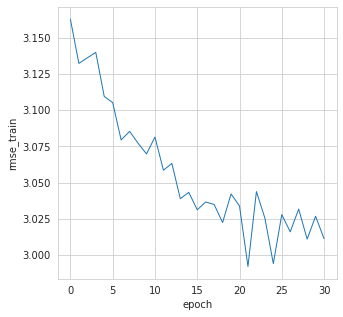

In [ ]:
header = {
        "col_user": "userID",
        "col_item": "itemID",
        "col_rating": "rating",
    }

#instantiate the sparse matrix generation  
am = AffinityMatrix(df =rating_df, **header)

#obtain the sparse matrix 
X, _, _ = am.gen_affinity_matrix()
Xtr, Xtst = numpy_stratified_split(X)
#First we initialize the model class
model = RBM(
    possible_ratings=np.setdiff1d(np.unique(Xtr), np.array([0])),
    visible_units=Xtr.shape[1],
    hidden_units=200,
    training_epoch=30,
    minibatch_size=60,
    keep_prob=0.8,
    with_metrics=True
)
# Model Fit
model.fit(Xtr)

# Plot the train RMSE as a function of the epochs
line_graph(values=model.rmse_train, labels='train', x_name='epoch', y_name='rmse_train')


In [ ]:
top_k =  model.recommend_k_items(Xtst)
top_k_df = am.map_back_sparse(top_k, kind = 'prediction')
test_df = am.map_back_sparse(Xtst, kind = 'ratings')

In [ ]:
eval_precision = precision_at_k(test_df, top_k_df, col_user="userID", col_item="itemID", 
                               col_rating="rating", col_prediction="prediction", 
                               relevancy_method="top_k", k= 20)

In [ ]:
eval_recall = recall_at_k(test_df, top_k_df, col_user="userID", col_item="itemID", 
                          col_rating="rating", col_prediction="prediction", 
                          relevancy_method="top_k", k= 20)


In [ ]:
df2 = {'Dataset':"Book Dataset",'Algorithm':"RBM",'Sparsity':sparsity_book,'Precision@k':eval_precision,'Recall@k':eval_recall}
summary_df = summary_df.append(df2, ignore_index = True)

#BPR

In [ ]:
import cornac
from recommenders.datasets.python_splitters import python_random_split,python_stratified_split
from recommenders.evaluation.python_evaluation import map_at_k, ndcg_at_k, precision_at_k, recall_at_k
from recommenders.models.cornac.cornac_utils import predict_ranking
from recommenders.utils.timer import Timer
from recommenders.utils.constants import SEED



In [ ]:
df=amazon_df.copy()
df=df[['userID','itemID','rating']]
train, test = python_stratified_split(df, 0.75)

train_set = cornac.data.Dataset.from_uir(train.itertuples(index=False), seed=SEED)
bpr = cornac.models.BPR(
    k=200,
    max_iter=100,
    learning_rate=0.01,
    lambda_reg=0.001,
    verbose=True,
    seed=42
)

bpr.fit(train_set)

all_predictions = predict_ranking(bpr, train, usercol='userID', itemcol='itemID', remove_seen=True)

k = 10
eval_precision = precision_at_k(test, all_predictions, col_prediction='prediction', k=k)
eval_recall = recall_at_k(test, all_predictions, col_prediction='prediction', k=k)

print(
      "Precision@K:\t%f" % eval_precision,
      "Recall@K:\t%f" % eval_recall, sep='\n')


  0%|          | 0/100 [00:00<?, ?it/s]

Optimization finished!
Precision@K:	0.024597
Recall@K:	0.039948


In [ ]:

df2 = {'Dataset':"Amazon Product",'Algorithm':"BPR",'Sparsity':sparsity_amazon,'Recall@K':eval_recall,'Precision@k': eval_precision }
summary_df = summary_df.append(df2, ignore_index = True)
summary_df

,Dataset,Algorithm,Sparsity,Precision@k,HitRate@k,Recall@K,Recall@k
0,Amazon Product,Factorization Machine,0.991913,0.013203,0.122064,0.023967,NaN
1,MovieLens,Factorization Machine,0.900793,0.088747,0.577495,0.065411,NaN
2,Food.com,Factorization Machine,0.975859,0.020511,0.174214,0.021399,NaN
3,Book Dataset,Factorization Machine,0.991187,0.014668,0.125921,0.024001,NaN
4,Ciao,Factorization Machine,0.991187,0.040464,0.295455,0.052317,NaN
5,MovieLens,RBM,0.900793,0.298887,NaN,NaN,0.373515
6,Food.com,RBM,0.975859,0.102619,NaN,NaN,0.332255
7,Amazon Product,RBM,0.991913,0.064340,NaN,NaN,0.298161
8,Ciao,RBM,0.991913,0.037064,NaN,NaN,0.101775
9,Book Dataset,RBM,0.991187,0.099566,NaN,NaN,0.334582


In [ ]:
df=movie_10k_df.copy()
df=df[['userID','itemID','rating']]
train, test = python_stratified_split(df, 0.75)

train_set = cornac.data.Dataset.from_uir(train.itertuples(index=False), seed=SEED)
bpr = cornac.models.BPR(
    k=200,
    max_iter=100,
    learning_rate=0.01,
    lambda_reg=0.001,
    verbose=True,
    seed=42
)

bpr.fit(train_set)

all_predictions = predict_ranking(bpr, train, usercol='userID', itemcol='itemID', remove_seen=True)

k = 10
eval_precision = precision_at_k(test, all_predictions, col_prediction='prediction', k=k)
eval_recall = recall_at_k(test, all_predictions, col_prediction='prediction', k=k)

print(
      "Precision@K:\t%f" % eval_precision,
      "Recall@K:\t%f" % eval_recall, sep='\n')


  0%|          | 0/100 [00:00<?, ?it/s]

Optimization finished!
Precision@K:	0.391729
Recall@K:	0.208324


In [ ]:

df2 = {'Dataset':"MovieLens",'Algorithm':"BPR",'Sparsity':sparsity_movielens,'Recall@K':eval_recall,'Precision@k': eval_precision }
summary_df = summary_df.append(df2, ignore_index = True)
summary_df

,Dataset,Algorithm,Sparsity,Precision@k,HitRate@k,Recall@K,Recall@k
0,Amazon Product,Factorization Machine,0.991913,0.013203,0.122064,0.023967,NaN
1,MovieLens,Factorization Machine,0.900793,0.088747,0.577495,0.065411,NaN
2,Food.com,Factorization Machine,0.975859,0.020511,0.174214,0.021399,NaN
3,Book Dataset,Factorization Machine,0.991187,0.014668,0.125921,0.024001,NaN
4,Ciao,Factorization Machine,0.991187,0.040464,0.295455,0.052317,NaN
5,MovieLens,RBM,0.900793,0.298887,NaN,NaN,0.373515
6,Food.com,RBM,0.975859,0.102619,NaN,NaN,0.332255
7,Amazon Product,RBM,0.991913,0.064340,NaN,NaN,0.298161
8,Ciao,RBM,0.991913,0.037064,NaN,NaN,0.101775
9,Book Dataset,RBM,0.991187,0.099566,NaN,NaN,0.334582


In [ ]:
df=book_df.copy()

df=df[['userID','itemID','rating']]
train, test = python_stratified_split(df, 0.75)

train_set = cornac.data.Dataset.from_uir(train.itertuples(index=False), seed=SEED)
bpr = cornac.models.BPR(
    k=200,
    max_iter=100,
    learning_rate=0.01,
    lambda_reg=0.001,
    verbose=True,
    seed=42
)

bpr.fit(train_set)

all_predictions = predict_ranking(bpr, train, usercol='userID', itemcol='itemID', remove_seen=True)

k = 10
eval_precision = precision_at_k(test, all_predictions, col_prediction='prediction', k=k)
eval_recall = recall_at_k(test, all_predictions, col_prediction='prediction', k=k)

print(
      "Precision@K:\t%f" % eval_precision,
      "Recall@K:\t%f" % eval_recall, sep='\n')


  0%|          | 0/100 [00:00<?, ?it/s]

Optimization finished!
Precision@K:	0.017623
Recall@K:	0.024018


In [ ]:

df2 = {'Dataset':"Book Dataset",'Algorithm':"BPR",'Sparsity':sparsity_book,'Recall@K':eval_recall,'Precision@k': eval_precision }
summary_df = summary_df.append(df2, ignore_index = True)
summary_df

,Dataset,Algorithm,Sparsity,Precision@k,HitRate@k,Recall@K,Recall@k
0,Amazon Product,Factorization Machine,0.991913,0.013203,0.122064,0.023967,NaN
1,MovieLens,Factorization Machine,0.900793,0.088747,0.577495,0.065411,NaN
2,Food.com,Factorization Machine,0.975859,0.020511,0.174214,0.021399,NaN
3,Book Dataset,Factorization Machine,0.991187,0.014668,0.125921,0.024001,NaN
4,Ciao,Factorization Machine,0.991187,0.040464,0.295455,0.052317,NaN
5,MovieLens,RBM,0.900793,0.298887,NaN,NaN,0.373515
6,Food.com,RBM,0.975859,0.102619,NaN,NaN,0.332255
7,Amazon Product,RBM,0.991913,0.064340,NaN,NaN,0.298161
8,Ciao,RBM,0.991913,0.037064,NaN,NaN,0.101775
9,Book Dataset,RBM,0.991187,0.099566,NaN,NaN,0.334582


In [ ]:
df=food_df.copy()
df=df[['userID','itemID','rating']]
train, test = python_stratified_split(df, 0.75)

train_set = cornac.data.Dataset.from_uir(train.itertuples(index=False), seed=SEED)
bpr = cornac.models.BPR(
    k=200,
    max_iter=100,
    learning_rate=0.01,
    lambda_reg=0.001,
    verbose=True,
    seed=42
)

bpr.fit(train_set)

all_predictions = predict_ranking(bpr, train, usercol='userID', itemcol='itemID', remove_seen=True)

k = 10
eval_precision = precision_at_k(test, all_predictions, col_prediction='prediction', k=k)
eval_recall = recall_at_k(test, all_predictions, col_prediction='prediction', k=k)

print(
      "Precision@K:\t%f" % eval_precision,
      "Recall@K:\t%f" % eval_recall, sep='\n')


  0%|          | 0/100 [00:00<?, ?it/s]

Optimization finished!
Precision@K:	0.044421
Recall@K:	0.047085


In [ ]:

df2 = {'Dataset':"Food.com",'Algorithm':"BPR",'Sparsity':sparsity_food,'Recall@K':eval_recall,'Precision@k': eval_precision }
summary_df = summary_df.append(df2, ignore_index = True)
summary_df

,Dataset,Algorithm,Sparsity,Precision@k,HitRate@k,Recall@K,Recall@k
0,Amazon Product,Factorization Machine,0.991913,0.013203,0.122064,0.023967,NaN
1,MovieLens,Factorization Machine,0.900793,0.088747,0.577495,0.065411,NaN
2,Food.com,Factorization Machine,0.975859,0.020511,0.174214,0.021399,NaN
3,Book Dataset,Factorization Machine,0.991187,0.014668,0.125921,0.024001,NaN
4,Ciao,Factorization Machine,0.991187,0.040464,0.295455,0.052317,NaN
5,MovieLens,RBM,0.900793,0.298887,NaN,NaN,0.373515
6,Food.com,RBM,0.975859,0.102619,NaN,NaN,0.332255
7,Amazon Product,RBM,0.991913,0.064340,NaN,NaN,0.298161
8,Ciao,RBM,0.991913,0.037064,NaN,NaN,0.101775
9,Book Dataset,RBM,0.991187,0.099566,NaN,NaN,0.334582


In [ ]:
df=ciao_df.copy()

df=df[['userID','itemID','rating']]
train, test = python_stratified_split(df, 0.75)

train_set = cornac.data.Dataset.from_uir(train.itertuples(index=False), seed=SEED)
bpr = cornac.models.BPR(
    k=200,
    max_iter=100,
    learning_rate=0.01,
    lambda_reg=0.001,
    verbose=True,
    seed=42
)

bpr.fit(train_set)

all_predictions = predict_ranking(bpr, train, usercol='userID', itemcol='itemID', remove_seen=True)

k = 10
eval_precision = precision_at_k(test, all_predictions, col_prediction='prediction', k=k)
eval_recall = recall_at_k(test, all_predictions, col_prediction='prediction', k=k)

print(
      "Precision@K:\t%f" % eval_precision,
      "Recall@K:\t%f" % eval_recall, sep='\n')


/usr/local/lib/python3.8/dist-packages/cornac/data/dataset.py:361: UserWarning: 482 duplicated observations are removed!
  warnings.warn("%d duplicated observations are removed!" % dup_count)


  0%|          | 0/100 [00:00<?, ?it/s]

Optimization finished!
Precision@K:	0.076829
Recall@K:	0.082768


In [ ]:

df2 = {'Dataset':"Ciao",'Algorithm':"BPR",'Sparsity':sparsity_book,'Recall@K':eval_recall,'Precision@k': eval_precision }
summary_df = summary_df.append(df2, ignore_index = True)
summary_df

,Dataset,Algorithm,Sparsity,Precision@k,HitRate@k,Recall@K,Recall@k
0,Amazon Product,Factorization Machine,0.991913,0.013203,0.122064,0.023967,NaN
1,MovieLens,Factorization Machine,0.900793,0.088747,0.577495,0.065411,NaN
2,Food.com,Factorization Machine,0.975859,0.020511,0.174214,0.021399,NaN
3,Book Dataset,Factorization Machine,0.991187,0.014668,0.125921,0.024001,NaN
4,Ciao,Factorization Machine,0.991187,0.040464,0.295455,0.052317,NaN
5,MovieLens,RBM,0.900793,0.298887,NaN,NaN,0.373515
6,Food.com,RBM,0.975859,0.102619,NaN,NaN,0.332255
7,Amazon Product,RBM,0.991913,0.064340,NaN,NaN,0.298161
8,Ciao,RBM,0.991913,0.037064,NaN,NaN,0.101775
9,Book Dataset,RBM,0.991187,0.099566,NaN,NaN,0.334582


In [ ]:
summary_df.sort_values(by=['Dataset','Precision@k'],ascending=False)

,Dataset,Algorithm,Sparsity,Precision@k,HitRate@k,Recall@K,Recall@k
11,MovieLens,BPR,0.900793,0.391729,NaN,0.208324,NaN
5,MovieLens,RBM,0.900793,0.298887,NaN,NaN,0.373515
1,MovieLens,Factorization Machine,0.900793,0.088747,0.577495,0.065411,NaN
6,Food.com,RBM,0.975859,0.102619,NaN,NaN,0.332255
13,Food.com,BPR,0.975859,0.044421,NaN,0.047085,NaN
2,Food.com,Factorization Machine,0.975859,0.020511,0.174214,0.021399,NaN
14,Ciao,BPR,0.991187,0.076829,NaN,0.082768,NaN
4,Ciao,Factorization Machine,0.991187,0.040464,0.295455,0.052317,NaN
8,Ciao,RBM,0.991913,0.037064,NaN,NaN,0.101775
9,Book Dataset,RBM,0.991187,0.099566,NaN,NaN,0.334582


# LightGCN

In [ ]:
!pip install recommenders

In [ ]:
from recommenders.utils.timer import Timer
from recommenders.models.deeprec.models.graphrec.lightgcn import LightGCN
from recommenders.models.deeprec.DataModel.ImplicitCF import ImplicitCF
from recommenders.datasets import movielens
from recommenders.datasets.python_splitters import python_stratified_split
from recommenders.evaluation.python_evaluation import map_at_k, ndcg_at_k, precision_at_k, recall_at_k
from recommenders.utils.constants import SEED as DEFAULT_SEED
from recommenders.models.deeprec.deeprec_utils import prepare_hparams

In [ ]:
from datetime import datetime


In [ ]:
SEED=0
# top k items to recommend
TOP_K = 10

# Model parameters
EPOCHS = 20
BATCH_SIZE = 256

In [ ]:
def runLighGCN(df_input):
  gcn_df=df_input.copy()
  ct = datetime.now()

  ts = ct.timestamp()
  if timestamp is None:
    gcn_df['timestamp']=ts 
  else:
    gcn_df.rename(columns={timestamp:'timestamp'},inplace=True)
  gcn_df.reset_index()
  gcn_df=gcn_df[['userID','itemID','rating','timestamp']]
  gcn_item_ids = list(set(list(gcn_df.itemID.unique())))
  gcn_user_ids = list(set(list(gcn_df.userID.unique())))
  dict_items = {}
  index = 0
  for ids in sorted(gcn_item_ids):
      dict_items[ids] = index
      index += 1
  dict_users = {}
  index = 0
  for ids in sorted(gcn_user_ids):
      dict_users[ids] = index
      index += 1
  gcn_df["itemID"] = gcn_df["itemID"].map(dict_items)
  gcn_df["userID"] = gcn_df["userID"].map(dict_users)
  gcn_df.reset_index()
  train, test = python_stratified_split(gcn_df, ratio=0.8)
  data = ImplicitCF(train=train, test=test, seed=SEED)
  yaml_file = "param_gcn.yaml"
  hparams = prepare_hparams(yaml_file,
                            n_layers=4,
                            batch_size=BATCH_SIZE,
                            epochs=EPOCHS,
                            learning_rate=0.005,
                            eval_epoch=5,
                            top_k=TOP_K,
                           )
  model = LightGCN(hparams, data, seed=SEED)
  before= datetime.now()
  model.fit()
  after= datetime.now()
  duration=after-before
  topk_scores = model.recommend_k_items(test, top_k=TOP_K, remove_seen=True)
  eval_map = map_at_k(test, topk_scores, k=TOP_K)
  eval_ndcg = ndcg_at_k(test, topk_scores, k=TOP_K)
  eval_precision = precision_at_k(test, topk_scores, k=TOP_K)
  eval_recall = recall_at_k(test, topk_scores, k=TOP_K)
  # Record results with papermill for tests
  print("map"+ str(eval_map))
  print("ndcg"+ str(eval_ndcg))
  print("precision"+ str( eval_precision))
  print("recall"+ str(eval_recall))
  return eval_map,eval_ndcg,eval_precision,eval_recall,duration.total_seconds()

In [ ]:
df=food_df.copy()
gcn_eval_map,gcn_eval_ndcg,gcn_eval_precision,gcn_eval_recall,gcn_duration=None,None,None,None,None

gcn_eval_map,gcn_eval_ndcg,gcn_eval_precision,gcn_eval_recall,gcn_duration=runLighGCN(df)



Already create adjacency matrix.
Already normalize adjacency matrix.
Using xavier initialization.
Epoch 1 (train)1.6s: train loss = 0.62971 = (mf)0.62946 + (embed)0.00025
Epoch 2 (train)1.3s: train loss = 0.56699 = (mf)0.56633 + (embed)0.00067
Epoch 3 (train)1.2s: train loss = 0.52383 = (mf)0.52270 + (embed)0.00113
Epoch 4 (train)1.5s: train loss = 0.47817 = (mf)0.47650 + (embed)0.00167
Epoch 5 (train)1.7s + (eval)0.4s: train loss = 0.43566 = (mf)0.43335 + (embed)0.00230, recall = 0.04392, ndcg = 0.04820, precision = 0.03379, map = 0.01776
Epoch 6 (train)1.9s: train loss = 0.38692 = (mf)0.38388 + (embed)0.00305
Epoch 7 (train)1.9s: train loss = 0.34435 = (mf)0.34046 + (embed)0.00389
Epoch 8 (train)1.8s: train loss = 0.31390 = (mf)0.30917 + (embed)0.00473
Epoch 9 (train)1.8s: train loss = 0.28141 = (mf)0.27583 + (embed)0.00559
Epoch 10 (train)1.9s + (eval)0.3s: train loss = 0.25334 = (mf)0.24687 + (embed)0.00648, recall = 0.04576, ndcg = 0.04899, precision = 0.03478, map = 0.01755
Epoch

In [ ]:
df2 = {'Dataset':"Food.com",'Algorithm':"LightGCN",'Sparsity':sparsity_food,'Precision@k':gcn_eval_precision,'Recall@k':gcn_eval_recall}
summary_df = summary_df.append(df2, ignore_index = True)

In [ ]:
summary_df

,Dataset,Algorithm,Sparsity,Precision@k,HitRate@k,Recall@K,Recall@k
0,Amazon Product,Factorization Machine,0.991913,0.013203,0.122064,0.023967,NaN
1,MovieLens,Factorization Machine,0.900793,0.088747,0.577495,0.065411,NaN
2,Food.com,Factorization Machine,0.975859,0.020511,0.174214,0.021399,NaN
3,Book Dataset,Factorization Machine,0.991187,0.014668,0.125921,0.024001,NaN
4,Ciao,Factorization Machine,0.991187,0.040464,0.295455,0.052317,NaN
5,MovieLens,RBM,0.900793,0.298887,NaN,NaN,0.373515
6,Food.com,RBM,0.975859,0.102619,NaN,NaN,0.332255
7,Amazon Product,RBM,0.991913,0.064340,NaN,NaN,0.298161
8,Ciao,RBM,0.991913,0.037064,NaN,NaN,0.101775
9,Book Dataset,RBM,0.991187,0.099566,NaN,NaN,0.334582


In [ ]:
df=movie_10k_df.copy()

gcn_eval_map,gcn_eval_ndcg,gcn_eval_precision,gcn_eval_recall,gcn_duration=None,None,None,None,None

gcn_eval_map,gcn_eval_ndcg,gcn_eval_precision,gcn_eval_recall,gcn_duration=runLighGCN(df)



Already create adjacency matrix.
Already normalize adjacency matrix.
Using xavier initialization.
Epoch 1 (train)2.2s: train loss = 0.43610 = (mf)0.43552 + (embed)0.00058
Epoch 2 (train)1.8s: train loss = 0.33623 = (mf)0.33504 + (embed)0.00119
Epoch 3 (train)1.9s: train loss = 0.31138 = (mf)0.30987 + (embed)0.00151
Epoch 4 (train)1.9s: train loss = 0.28018 = (mf)0.27822 + (embed)0.00196
Epoch 5 (train)2.5s + (eval)0.4s: train loss = 0.25686 = (mf)0.25435 + (embed)0.00250, recall = 0.19760, ndcg = 0.36120, precision = 0.30318, map = 0.11478
Epoch 6 (train)3.3s: train loss = 0.24847 = (mf)0.24554 + (embed)0.00293
Epoch 7 (train)3.6s: train loss = 0.24183 = (mf)0.23858 + (embed)0.00325
Epoch 8 (train)3.2s: train loss = 0.23323 = (mf)0.22971 + (embed)0.00352
Epoch 9 (train)3.4s: train loss = 0.22580 = (mf)0.22198 + (embed)0.00382
Epoch 10 (train)3.2s + (eval)0.3s: train loss = 0.22209 = (mf)0.21798 + (embed)0.00411, recall = 0.21364, ndcg = 0.38322, precision = 0.32238, map = 0.12709
Epoch

In [ ]:
df2 = {'Dataset':"MovieLens",'Algorithm':"LightGCN",'Sparsity':sparsity_movielens,'Precision@k':gcn_eval_precision,'Recall@k':gcn_eval_recall}
summary_df = summary_df.append(df2, ignore_index = True)

In [ ]:
summary_df

,Dataset,Algorithm,Sparsity,Precision@k,HitRate@k,Recall@K,Recall@k
0,Amazon Product,Factorization Machine,0.991913,0.013203,0.122064,0.023967,NaN
1,MovieLens,Factorization Machine,0.900793,0.088747,0.577495,0.065411,NaN
2,Food.com,Factorization Machine,0.975859,0.020511,0.174214,0.021399,NaN
3,Book Dataset,Factorization Machine,0.991187,0.014668,0.125921,0.024001,NaN
4,Ciao,Factorization Machine,0.991187,0.040464,0.295455,0.052317,NaN
5,MovieLens,RBM,0.900793,0.298887,NaN,NaN,0.373515
6,Food.com,RBM,0.975859,0.102619,NaN,NaN,0.332255
7,Amazon Product,RBM,0.991913,0.064340,NaN,NaN,0.298161
8,Ciao,RBM,0.991913,0.037064,NaN,NaN,0.101775
9,Book Dataset,RBM,0.991187,0.099566,NaN,NaN,0.334582


In [ ]:
df=amazon_df.copy()

gcn_eval_map,gcn_eval_ndcg,gcn_eval_precision,gcn_eval_recall,gcn_duration=None,None,None,None,None

gcn_eval_map,gcn_eval_ndcg,gcn_eval_precision,gcn_eval_recall,gcn_duration=runLighGCN(df)



Already create adjacency matrix.
Already normalize adjacency matrix.
Using xavier initialization.
Epoch 1 (train)1.4s: train loss = 0.53198 = (mf)0.53160 + (embed)0.00037
Epoch 2 (train)1.1s: train loss = 0.41774 = (mf)0.41686 + (embed)0.00088
Epoch 3 (train)1.1s: train loss = 0.37832 = (mf)0.37714 + (embed)0.00117
Epoch 4 (train)1.1s: train loss = 0.34914 = (mf)0.34769 + (embed)0.00145
Epoch 5 (train)1.1s + (eval)0.4s: train loss = 0.32247 = (mf)0.32070 + (embed)0.00177, recall = 0.04945, ndcg = 0.04306, precision = 0.02319, map = 0.02055
Epoch 6 (train)1.1s: train loss = 0.29576 = (mf)0.29366 + (embed)0.00210
Epoch 7 (train)1.1s: train loss = 0.27257 = (mf)0.27010 + (embed)0.00247
Epoch 8 (train)1.1s: train loss = 0.24734 = (mf)0.24448 + (embed)0.00286
Epoch 9 (train)1.1s: train loss = 0.22511 = (mf)0.22185 + (embed)0.00327
Epoch 10 (train)1.1s + (eval)0.4s: train loss = 0.20239 = (mf)0.19869 + (embed)0.00370, recall = 0.05706, ndcg = 0.04865, precision = 0.02617, map = 0.02341
Epoch

In [ ]:
df2 = {'Dataset':"Amazon Product",'Algorithm':"LightGCN",'Sparsity':sparsity_amazon,'Precision@k':gcn_eval_precision,'Recall@k':gcn_eval_recall}
summary_df = summary_df.append(df2, ignore_index = True)

In [ ]:
summary_df

,Dataset,Algorithm,Sparsity,Precision@k,HitRate@k,Recall@K,Recall@k
0,Amazon Product,Factorization Machine,0.991913,0.013203,0.122064,0.023967,NaN
1,MovieLens,Factorization Machine,0.900793,0.088747,0.577495,0.065411,NaN
2,Food.com,Factorization Machine,0.975859,0.020511,0.174214,0.021399,NaN
3,Book Dataset,Factorization Machine,0.991187,0.014668,0.125921,0.024001,NaN
4,Ciao,Factorization Machine,0.991187,0.040464,0.295455,0.052317,NaN
5,MovieLens,RBM,0.900793,0.298887,NaN,NaN,0.373515
6,Food.com,RBM,0.975859,0.102619,NaN,NaN,0.332255
7,Amazon Product,RBM,0.991913,0.064340,NaN,NaN,0.298161
8,Ciao,RBM,0.991913,0.037064,NaN,NaN,0.101775
9,Book Dataset,RBM,0.991187,0.099566,NaN,NaN,0.334582


In [ ]:
df=book_df.copy()

ct = datetime.now()

ts = ct.timestamp()

df['timestamp']=ts 

gcn_eval_map,gcn_eval_ndcg,gcn_eval_precision,gcn_eval_recall,gcn_duration=None,None,None,None,None

gcn_eval_map,gcn_eval_ndcg,gcn_eval_precision,gcn_eval_recall,gcn_duration=runLighGCN(df)



Already create adjacency matrix.
Already normalize adjacency matrix.
Using xavier initialization.
Epoch 1 (train)1.0s: train loss = 0.58446 = (mf)0.58422 + (embed)0.00023
Epoch 2 (train)0.8s: train loss = 0.44811 = (mf)0.44744 + (embed)0.00067
Epoch 3 (train)0.8s: train loss = 0.37260 = (mf)0.37154 + (embed)0.00106
Epoch 4 (train)0.8s: train loss = 0.32661 = (mf)0.32518 + (embed)0.00143
Epoch 5 (train)1.1s + (eval)0.3s: train loss = 0.29197 = (mf)0.29019 + (embed)0.00179, recall = 0.05357, ndcg = 0.04985, precision = 0.02931, map = 0.02242
Epoch 6 (train)1.0s: train loss = 0.26961 = (mf)0.26749 + (embed)0.00213
Epoch 7 (train)1.0s: train loss = 0.23974 = (mf)0.23727 + (embed)0.00246
Epoch 8 (train)0.7s: train loss = 0.21782 = (mf)0.21501 + (embed)0.00281
Epoch 9 (train)0.8s: train loss = 0.19764 = (mf)0.19448 + (embed)0.00316
Epoch 10 (train)0.8s + (eval)0.2s: train loss = 0.18208 = (mf)0.17857 + (embed)0.00351, recall = 0.06603, ndcg = 0.06007, precision = 0.03611, map = 0.02768
Epoch

In [ ]:
df2 = {'Dataset':"Book Dataset",'Algorithm':"LightGCN",'Sparsity':sparsity_book,'Precision@k':gcn_eval_precision,'Recall@k':gcn_eval_recall}
summary_df = summary_df.append(df2, ignore_index = True)

In [ ]:
summary_df

,Dataset,Algorithm,Sparsity,Precision@k,HitRate@k,Recall@K,Recall@k
0,Amazon Product,Factorization Machine,0.991913,0.013203,0.122064,0.023967,NaN
1,MovieLens,Factorization Machine,0.900793,0.088747,0.577495,0.065411,NaN
2,Food.com,Factorization Machine,0.975859,0.020511,0.174214,0.021399,NaN
3,Book Dataset,Factorization Machine,0.991187,0.014668,0.125921,0.024001,NaN
4,Ciao,Factorization Machine,0.991187,0.040464,0.295455,0.052317,NaN
5,MovieLens,RBM,0.900793,0.298887,NaN,NaN,0.373515
6,Food.com,RBM,0.975859,0.102619,NaN,NaN,0.332255
7,Amazon Product,RBM,0.991913,0.064340,NaN,NaN,0.298161
8,Ciao,RBM,0.991913,0.037064,NaN,NaN,0.101775
9,Book Dataset,RBM,0.991187,0.099566,NaN,NaN,0.334582


In [ ]:
df=ciao_df.copy()

ct = datetime.now()

ts = ct.timestamp()

df['timestamp']=ts 
gcn_eval_map,gcn_eval_ndcg,gcn_eval_precision,gcn_eval_recall,gcn_duration=None,None,None,None,None

gcn_eval_map,gcn_eval_ndcg,gcn_eval_precision,gcn_eval_recall,gcn_duration=runLighGCN(df)



Already create adjacency matrix.
Already normalize adjacency matrix.
Using xavier initialization.
Epoch 1 (train)1.6s: train loss = 0.46435 = (mf)0.46392 + (embed)0.00043
Epoch 2 (train)1.3s: train loss = 0.35783 = (mf)0.35695 + (embed)0.00087
Epoch 3 (train)1.3s: train loss = 0.33580 = (mf)0.33471 + (embed)0.00108
Epoch 4 (train)1.2s: train loss = 0.29856 = (mf)0.29719 + (embed)0.00136
Epoch 5 (train)1.3s + (eval)0.4s: train loss = 0.27753 = (mf)0.27587 + (embed)0.00166, recall = 0.10429, ndcg = 0.10776, precision = 0.07089, map = 0.04953
Epoch 6 (train)1.3s: train loss = 0.25361 = (mf)0.25164 + (embed)0.00197
Epoch 7 (train)1.3s: train loss = 0.23271 = (mf)0.23043 + (embed)0.00228
Epoch 8 (train)1.3s: train loss = 0.21629 = (mf)0.21371 + (embed)0.00258
Epoch 9 (train)1.4s: train loss = 0.19978 = (mf)0.19686 + (embed)0.00291
Epoch 10 (train)1.4s + (eval)0.4s: train loss = 0.18525 = (mf)0.18202 + (embed)0.00323, recall = 0.10445, ndcg = 0.10842, precision = 0.07143, map = 0.04938
Epoch

In [ ]:
df2 = {'Dataset':"Ciao	",'Algorithm':"LightGCN",'Sparsity':sparsity_movielens,'Precision@k':gcn_eval_precision,'Recall@k':gcn_eval_recall}
summary_df = summary_df.append(df2, ignore_index = True)

# BiVAE

In [ ]:

from recommenders.datasets.python_splitters import python_random_split,  python_stratified_split

from recommenders.evaluation.python_evaluation import map_at_k, ndcg_at_k, precision_at_k, recall_at_k
from recommenders.models.cornac.cornac_utils import predict_ranking
from recommenders.utils.timer import Timer
from recommenders.utils.constants import SEED


In [ ]:
import torch
import cornac

In [ ]:
import pandas as pd
from recommenders.datasets import movielens
from recommenders.datasets.python_splitters import python_random_split
from recommenders.evaluation.python_evaluation import map_at_k, ndcg_at_k, precision_at_k, recall_at_k
from recommenders.models.cornac.cornac_utils import predict_ranking
from recommenders.utils.timer import Timer
from recommenders.utils.constants import SEED

In [ ]:
TOP_K = 10

# Model parameters
LATENT_DIM = 50
ENCODER_DIMS = [100]
ACT_FUNC = "tanh"
LIKELIHOOD = "pois"
NUM_EPOCHS = 50
BATCH_SIZE = 512
LEARNING_RATE = 0.001

In [ ]:
rating_df=movie_10k_df.copy()
rating_df['rating']=1

In [ ]:
item_ids = list(set(list(rating_df.itemID.unique())))
user_ids = list(set(list(rating_df.userID.unique())))
dict_users = {}
index = 0
for ids in sorted(user_ids):
    dict_users[ids] = index
    index += 1
dict_items = {}
index = 0
for ids in sorted(item_ids):
    dict_items[ids] = index
    index += 1
rating_df['userID'] = rating_df.userID.map(dict_users)
rating_df['itemID'] = rating_df.itemID.map(dict_items)
train, test = python_random_split(rating_df, 0.75)
train_set = cornac.data.Dataset.from_uir(train.itertuples(index=False), seed=SEED)

#First we initialize the model class
model = bivae = cornac.models.BiVAECF(
    k=LATENT_DIM,
    encoder_structure=ENCODER_DIMS,
    act_fn=ACT_FUNC,
    likelihood=LIKELIHOOD,
    n_epochs=NUM_EPOCHS,
    batch_size=BATCH_SIZE,
    learning_rate=LEARNING_RATE,
    seed=SEED,
    use_gpu=torch.cuda.is_available(),
    verbose=True
)
# Model Fit
model.fit(train_set)

all_predictions = predict_ranking(bivae, train, usercol='userID', itemcol='itemID', remove_seen=True)
eval_precision = precision_at_k(test, all_predictions, col_prediction='prediction', k=TOP_K)
eval_recall = recall_at_k(test, all_predictions, col_prediction='prediction', k=TOP_K)

print(
      "Precision@K:\t%f" % eval_precision,
      "Recall@K:\t%f" % eval_recall, sep='\n')


In [ ]:
df2 = {'Dataset':"MovieLens",'Algorithm':"BiVAE",'Sparsity':sparsity_movielens,'Precision@k':eval_precision,'Recall@k':eval_recall}
summary_df = summary_df.append(df2, ignore_index = True)

In [ ]:
summary_df

In [ ]:
rating_df=food_df.copy()
rating_df['rating']=1
item_ids = list(set(list(rating_df.itemID.unique())))
user_ids = list(set(list(rating_df.userID.unique())))
dict_users = {}
index = 0
for ids in sorted(user_ids):
    dict_users[ids] = index
    index += 1
dict_items = {}
index = 0
for ids in sorted(item_ids):
    dict_items[ids] = index
    index += 1
rating_df['userID'] = rating_df.userID.map(dict_users)
rating_df['itemID'] = rating_df.itemID.map(dict_items)
train, test = python_random_split(rating_df, 0.75)
train_set = cornac.data.Dataset.from_uir(train.itertuples(index=False), seed=SEED)

#First we initialize the model class
model = bivae = cornac.models.BiVAECF(
    k=LATENT_DIM,
    encoder_structure=ENCODER_DIMS,
    act_fn=ACT_FUNC,
    likelihood=LIKELIHOOD,
    n_epochs=NUM_EPOCHS,
    batch_size=BATCH_SIZE,
    learning_rate=LEARNING_RATE,
    seed=SEED,
    use_gpu=torch.cuda.is_available(),
    verbose=True
)
# Model Fit
model.fit(train_set)

all_predictions = predict_ranking(bivae, train, usercol='userID', itemcol='itemID', remove_seen=True)
eval_precision = precision_at_k(test, all_predictions, col_prediction='prediction', k=TOP_K)
eval_recall = recall_at_k(test, all_predictions, col_prediction='prediction', k=TOP_K)

print(
      "Precision@K:\t%f" % eval_precision,
      "Recall@K:\t%f" % eval_recall, sep='\n')


In [ ]:
df2 = {'Dataset':"Food.com",'Algorithm':"BiVAE",'Sparsity':sparsity_food,'Precision@k':eval_precision,'Recall@k':eval_recall}
summary_df = summary_df.append(df2, ignore_index = True)

In [ ]:
summary_df

In [ ]:
rating_df=amazon_df.copy()
rating_df['rating']=1
item_ids = list(set(list(rating_df.itemID.unique())))
user_ids = list(set(list(rating_df.userID.unique())))
dict_users = {}
index = 0
for ids in sorted(user_ids):
    dict_users[ids] = index
    index += 1
dict_items = {}
index = 0
for ids in sorted(item_ids):
    dict_items[ids] = index
    index += 1
rating_df['userID'] = rating_df.userID.map(dict_users)
rating_df['itemID'] = rating_df.itemID.map(dict_items)
train, test = python_random_split(rating_df, 0.75)
train_set = cornac.data.Dataset.from_uir(train.itertuples(index=False), seed=SEED)

#First we initialize the model class
model = bivae = cornac.models.BiVAECF(
    k=LATENT_DIM,
    encoder_structure=ENCODER_DIMS,
    act_fn=ACT_FUNC,
    likelihood=LIKELIHOOD,
    n_epochs=NUM_EPOCHS,
    batch_size=BATCH_SIZE,
    learning_rate=LEARNING_RATE,
    seed=SEED,
    use_gpu=torch.cuda.is_available(),
    verbose=True
)
# Model Fit
model.fit(train_set)

all_predictions = predict_ranking(bivae, train, usercol='userID', itemcol='itemID', remove_seen=True)
eval_precision = precision_at_k(test, all_predictions, col_prediction='prediction', k=TOP_K)
eval_recall = recall_at_k(test, all_predictions, col_prediction='prediction', k=TOP_K)

print(
      "Precision@K:\t%f" % eval_precision,
      "Recall@K:\t%f" % eval_recall, sep='\n')


In [ ]:
df2 = {'Dataset':"Amazon Product",'Algorithm':"BiVAE",'Sparsity':sparsity_amazon,'Precision@k':eval_precision,'Recall@k':eval_recall}
summary_df = summary_df.append(df2, ignore_index = True)

In [ ]:
rating_df=book_df.copy()
rating_df['rating']=1
item_ids = list(set(list(rating_df.itemID.unique())))
user_ids = list(set(list(rating_df.userID.unique())))
dict_users = {}
index = 0
for ids in sorted(user_ids):
    dict_users[ids] = index
    index += 1
dict_items = {}
index = 0
for ids in sorted(item_ids):
    dict_items[ids] = index
    index += 1
rating_df['userID'] = rating_df.userID.map(dict_users)
rating_df['itemID'] = rating_df.itemID.map(dict_items)
train, test = python_random_split(rating_df, 0.75)
train_set = cornac.data.Dataset.from_uir(train.itertuples(index=False), seed=SEED)

#First we initialize the model class
model = bivae = cornac.models.BiVAECF(
    k=LATENT_DIM,
    encoder_structure=ENCODER_DIMS,
    act_fn=ACT_FUNC,
    likelihood=LIKELIHOOD,
    n_epochs=NUM_EPOCHS,
    batch_size=BATCH_SIZE,
    learning_rate=LEARNING_RATE,
    seed=SEED,
    use_gpu=torch.cuda.is_available(),
    verbose=True
)
# Model Fit
model.fit(train_set)

all_predictions = predict_ranking(bivae, train, usercol='userID', itemcol='itemID', remove_seen=True)
eval_precision = precision_at_k(test, all_predictions, col_prediction='prediction', k=TOP_K)
eval_recall = recall_at_k(test, all_predictions, col_prediction='prediction', k=TOP_K)

print(
      "Precision@K:\t%f" % eval_precision,
      "Recall@K:\t%f" % eval_recall, sep='\n')


In [ ]:
df2 = {'Dataset':"Book Dataset",'Algorithm':"BiVAE",'Sparsity':sparsity_book,'Precision@k':eval_precision,'Recall@k':eval_recall}
summary_df = summary_df.append(df2, ignore_index = True)

In [ ]:
summary_df

# Compare Results

In [ ]:
summary_df[['Dataset','Algorithm','Precision@k']].sort_values(by=['Dataset','Precision@k'],ascending=False)

,Dataset,Algorithm,Precision@k
11,MovieLens,BPR,0.391729
16,MovieLens,LightGCN,0.350371
5,MovieLens,RBM,0.298887
1,MovieLens,Factorization Machine,0.088747
6,Food.com,RBM,0.102619
13,Food.com,BPR,0.044421
15,Food.com,LightGCN,0.033159
2,Food.com,Factorization Machine,0.020511
19,Ciao\t,LightGCN,0.075110
14,Ciao,BPR,0.076829


# NCF

In [ ]:
!pip install tf_slim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Movielens

In [ ]:
import pandas as pd
import tensorflow as tf
tf.get_logger().setLevel('ERROR') # only show error messages

from recommenders.utils.timer import Timer
from recommenders.models.ncf.ncf_singlenode import NCF
from recommenders.models.ncf.dataset import Dataset as NCFDataset
from recommenders.datasets import movielens
from recommenders.utils.notebook_utils import is_jupyter
from recommenders.datasets.python_splitters import python_chrono_split
from recommenders.evaluation.python_evaluation import (rmse, mae, rsquared, exp_var, map_at_k, ndcg_at_k, precision_at_k, 
                                                     recall_at_k, get_top_k_items)

In [ ]:
df=movie_10k_df.copy()
train, test = python_stratified_split(df, 0.75)

In [ ]:
SEED=0
# top k items to recommend
TOP_K = 10

# Model parameters
EPOCHS = 10
BATCH_SIZE = 256


In [ ]:
test = test[test["userID"].isin(train["userID"].unique())]
test = test[test["itemID"].isin(train["itemID"].unique())]
train_file = "./train.csv"
test_file = "./test.csv"
train.to_csv(train_file, index=False)
test.to_csv(test_file, index=False)
data = NCFDataset(train_file=train_file, test_file=test_file, seed=SEED)
model = NCF (
    n_users=data.n_users, 
    n_items=data.n_items,
    model_type="NeuMF",
    n_factors=4,
    layer_sizes=[16,8,4],
    n_epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    learning_rate=1e-3,
    verbose=10,
    seed=SEED
)
model.fit(data)

/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


In [ ]:
with Timer() as test_time:
    users, items, preds = [], [], []
    item = list(train.itemID.unique())
    for user in train.userID.unique():
        user = [user] * len(item) 
        users.extend(user)
        items.extend(item)
        preds.extend(list(model.predict(user, item, is_list=True)))

    all_predictions = pd.DataFrame(data={"userID": users, "itemID":items, "prediction":preds})

    merged = pd.merge(train, all_predictions, on=["userID", "itemID"], how="outer")
    all_predictions = merged[merged.rating.isnull()].drop('rating', axis=1)

print("Took {} seconds for prediction.".format(test_time))

Took 2.7200 seconds for prediction.


In [ ]:
eval_precision = precision_at_k(test, all_predictions, col_prediction='prediction', k=TOP_K)
eval_recall = recall_at_k(test, all_predictions, col_prediction='prediction', k=TOP_K)

print(
      "Precision@K:\t%f" % eval_precision,
      "Recall@K:\t%f" % eval_recall, sep='\n')

Precision@K:	0.360551
Recall@K:	0.194341


In [ ]:
df2 = {'Dataset':"Movie Lens",'Algorithm':"NCF",'Sparsity':sparsity_movielens,'Precision@k':eval_precision,'Recall@k':eval_recall}
summary_df = summary_df.append(df2, ignore_index = True)

In [ ]:
summary_df[['Dataset','Algorithm','Precision@k']].sort_values(by=['Dataset','Precision@k'],ascending=False)

,Dataset,Algorithm,Precision@k
11,MovieLens,BPR,0.391729
16,MovieLens,LightGCN,0.350371
5,MovieLens,RBM,0.298887
1,MovieLens,Factorization Machine,0.088747
20,Movie Lens,NCF,0.360551
6,Food.com,RBM,0.102619
13,Food.com,BPR,0.044421
15,Food.com,LightGCN,0.033159
2,Food.com,Factorization Machine,0.020511
19,Ciao\t,LightGCN,0.075110


### Food.com

In [ ]:
import pandas as pd
import tensorflow as tf
tf.get_logger().setLevel('ERROR') # only show error messages

from recommenders.utils.timer import Timer
from recommenders.models.ncf.ncf_singlenode import NCF
from recommenders.models.ncf.dataset import Dataset as NCFDataset
from recommenders.datasets import movielens
from recommenders.utils.notebook_utils import is_jupyter
from recommenders.datasets.python_splitters import python_chrono_split
from recommenders.evaluation.python_evaluation import (rmse, mae, rsquared, exp_var, map_at_k, ndcg_at_k, precision_at_k, 
                                                     recall_at_k, get_top_k_items)

In [ ]:
df=food_df.copy()
train, test = python_stratified_split(df, 0.75)

In [ ]:
SEED=0
# top k items to recommend
TOP_K = 10

# Model parameters
EPOCHS = 10
BATCH_SIZE = 256


In [ ]:
test = test[test["userID"].isin(train["userID"].unique())]
test = test[test["itemID"].isin(train["itemID"].unique())]
train_file = "./train.csv"
test_file = "./test.csv"
train.to_csv(train_file, index=False)
test.to_csv(test_file, index=False)
data = NCFDataset(train_file=train_file, test_file=test_file, seed=SEED)
model = NCF (
    n_users=data.n_users, 
    n_items=data.n_items,
    model_type="NeuMF",
    n_factors=4,
    layer_sizes=[16,8,4],
    n_epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    learning_rate=1e-3,
    verbose=10,
    seed=SEED
)
model.fit(data)

/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


In [ ]:
with Timer() as test_time:
    users, items, preds = [], [], []
    item = list(train.itemID.unique())
    for user in train.userID.unique():
        user = [user] * len(item) 
        users.extend(user)
        items.extend(item)
        preds.extend(list(model.predict(user, item, is_list=True)))

    all_predictions = pd.DataFrame(data={"userID": users, "itemID":items, "prediction":preds})

    merged = pd.merge(train, all_predictions, on=["userID", "itemID"], how="outer")
    all_predictions = merged[merged.rating.isnull()].drop('rating', axis=1)

print("Took {} seconds for prediction.".format(test_time))

Took 7.3828 seconds for prediction.


In [ ]:
eval_precision = precision_at_k(test, all_predictions, col_prediction='prediction', k=TOP_K)
eval_recall = recall_at_k(test, all_predictions, col_prediction='prediction', k=TOP_K)

print(
      "Precision@K:\t%f" % eval_precision,
      "Recall@K:\t%f" % eval_recall, sep='\n')

Precision@K:	0.037926
Recall@K:	0.039174


In [ ]:
df2 = {'Dataset':"Food.com",'Algorithm':"NCF",'Sparsity':sparsity_food,'Precision@k':eval_precision,'Recall@k':eval_recall}
summary_df = summary_df.append(df2, ignore_index = True)

In [ ]:
summary_df[['Dataset','Algorithm','Precision@k']].sort_values(by=['Dataset','Precision@k'],ascending=False)

,Dataset,Algorithm,Precision@k
11,MovieLens,BPR,0.391729
16,MovieLens,LightGCN,0.350371
5,MovieLens,RBM,0.298887
1,MovieLens,Factorization Machine,0.088747
20,Movie Lens,NCF,0.360551
6,Food.com,RBM,0.102619
13,Food.com,BPR,0.044421
21,Food.com,NCF,0.037926
15,Food.com,LightGCN,0.033159
2,Food.com,Factorization Machine,0.020511


### Book

In [ ]:
import pandas as pd
import tensorflow as tf
tf.get_logger().setLevel('ERROR') # only show error messages

from recommenders.utils.timer import Timer
from recommenders.models.ncf.ncf_singlenode import NCF
from recommenders.models.ncf.dataset import Dataset as NCFDataset
from recommenders.datasets import movielens
from recommenders.utils.notebook_utils import is_jupyter
from recommenders.datasets.python_splitters import python_chrono_split
from recommenders.evaluation.python_evaluation import (rmse, mae, rsquared, exp_var, map_at_k, ndcg_at_k, precision_at_k, 
                                                     recall_at_k, get_top_k_items)

In [ ]:
df=book_df.copy()

In [ ]:
product_ids = list(set(list(df.itemID.unique())))
user_ids = list(set(list(df.userID.unique())))

In [ ]:
dict_products = {}
index = 0
for ids in sorted(product_ids):
    dict_products[ids] = index
    index += 1

In [ ]:
dict_users = {}
index = 0
for ids in sorted(user_ids):
    dict_users[ids] = index
    index += 1

In [ ]:
df["itemID"] = df["itemID"].map(dict_products)
df["userID"] = df["userID"].map(dict_users)

In [ ]:
train, test = python_stratified_split(df, 0.75)

In [ ]:
SEED=0
# top k items to recommend
TOP_K = 10

# Model parameters
EPOCHS = 10
BATCH_SIZE = 256


In [ ]:
test = test[test["userID"].isin(train["userID"].unique())]
test = test[test["itemID"].isin(train["itemID"].unique())]
train_file = "./train.csv"
test_file = "./test.csv"
train.to_csv(train_file, index=False)
test.to_csv(test_file, index=False)
data = NCFDataset(train_file=train_file, test_file=test_file, seed=SEED)
model = NCF (
    n_users=data.n_users, 
    n_items=data.n_items,
    model_type="NeuMF",
    n_factors=4,
    layer_sizes=[16,8,4],
    n_epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    learning_rate=1e-3,
    verbose=10,
    seed=SEED
)
model.fit(data)

/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


In [ ]:
with Timer() as test_time:
    users, items, preds = [], [], []
    item = list(train.itemID.unique())
    for user in train.userID.unique():
        user = [user] * len(item) 
        users.extend(user)
        items.extend(item)
        preds.extend(list(model.predict(user, item, is_list=True)))

    all_predictions = pd.DataFrame(data={"userID": users, "itemID":items, "prediction":preds})

    merged = pd.merge(train, all_predictions, on=["userID", "itemID"], how="outer")
    all_predictions = merged[merged.rating.isnull()].drop('rating', axis=1)

print("Took {} seconds for prediction.".format(test_time))

Took 13.5301 seconds for prediction.


In [ ]:
eval_precision = precision_at_k(test, all_predictions, col_prediction='prediction', k=TOP_K)
eval_recall = recall_at_k(test, all_predictions, col_prediction='prediction', k=TOP_K)

print(
      "Precision@K:\t%f" % eval_precision,
      "Recall@K:\t%f" % eval_recall, sep='\n')

Precision@K:	0.025701
Recall@K:	0.035371


In [ ]:
df2 = {'Dataset':"Book Dataset",'Algorithm':"NCF",'Sparsity':sparsity_book,'Precision@k':eval_precision,'Recall@k':eval_recall}
summary_df = summary_df.append(df2, ignore_index = True)

In [ ]:
summary_df[['Dataset','Algorithm','Precision@k']].sort_values(by=['Dataset','Precision@k'],ascending=False)

,Dataset,Algorithm,Precision@k
11,MovieLens,BPR,0.391729
16,MovieLens,LightGCN,0.350371
5,MovieLens,RBM,0.298887
1,MovieLens,Factorization Machine,0.088747
20,Movie Lens,NCF,0.360551
6,Food.com,RBM,0.102619
13,Food.com,BPR,0.044421
21,Food.com,NCF,0.037926
15,Food.com,LightGCN,0.033159
2,Food.com,Factorization Machine,0.020511


### Amazon

In [ ]:
import pandas as pd
import tensorflow as tf
tf.get_logger().setLevel('ERROR') # only show error messages

from recommenders.utils.timer import Timer
from recommenders.models.ncf.ncf_singlenode import NCF
from recommenders.models.ncf.dataset import Dataset as NCFDataset
from recommenders.datasets import movielens
from recommenders.utils.notebook_utils import is_jupyter
from recommenders.datasets.python_splitters import python_chrono_split
from recommenders.evaluation.python_evaluation import (rmse, mae, rsquared, exp_var, map_at_k, ndcg_at_k, precision_at_k, 
                                                     recall_at_k, get_top_k_items)

In [ ]:
df=amazon_df.copy()


In [ ]:
product_ids = list(set(list(df.itemID.unique())))
user_ids = list(set(list(df.userID.unique())))

In [ ]:
dict_products = {}
index = 0
for ids in sorted(product_ids):
    dict_products[ids] = index
    index += 1

In [ ]:
dict_users = {}
index = 0
for ids in sorted(user_ids):
    dict_users[ids] = index
    index += 1

In [ ]:
df["itemID"] = df["itemID"].map(dict_products)
df["userID"] = df["userID"].map(dict_users)

In [ ]:
train, test = python_stratified_split(df, 0.75)

In [ ]:
SEED=0
# top k items to recommend
TOP_K = 10

# Model parameters
EPOCHS = 10
BATCH_SIZE = 256


In [ ]:
test = test[test["userID"].isin(train["userID"].unique())]
test = test[test["itemID"].isin(train["itemID"].unique())]
train_file = "./train.csv"
test_file = "./test.csv"
train.to_csv(train_file, index=False)
test.to_csv(test_file, index=False)
data = NCFDataset(train_file=train_file, test_file=test_file, seed=SEED)
model = NCF (
    n_users=data.n_users, 
    n_items=data.n_items,
    model_type="NeuMF",
    n_factors=4,
    layer_sizes=[16,8,4],
    n_epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    learning_rate=1e-3,
    verbose=10,
    seed=SEED
)
model.fit(data)

/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


In [ ]:
with Timer() as test_time:
    users, items, preds = [], [], []
    item = list(train.itemID.unique())
    for user in train.userID.unique():
        user = [user] * len(item) 
        users.extend(user)
        items.extend(item)
        preds.extend(list(model.predict(user, item, is_list=True)))

    all_predictions = pd.DataFrame(data={"userID": users, "itemID":items, "prediction":preds})

    merged = pd.merge(train, all_predictions, on=["userID", "itemID"], how="outer")
    all_predictions = merged[merged.rating.isnull()].drop('rating', axis=1)

print("Took {} seconds for prediction.".format(test_time))

Took 17.4794 seconds for prediction.


In [ ]:
eval_precision = precision_at_k(test, all_predictions, col_prediction='prediction', k=TOP_K)
eval_recall = recall_at_k(test, all_predictions, col_prediction='prediction', k=TOP_K)

print(
      "Precision@K:\t%f" % eval_precision,
      "Recall@K:\t%f" % eval_recall, sep='\n')

Precision@K:	0.024734
Recall@K:	0.039934


In [ ]:
df2 = {'Dataset':"Amazon Product",'Algorithm':"NCF",'Sparsity':sparsity_book,'Precision@k':eval_precision,'Recall@k':eval_recall}
summary_df = summary_df.append(df2, ignore_index = True)

In [ ]:
summary_df[['Dataset','Algorithm','Precision@k']].sort_values(by=['Dataset','Precision@k'],ascending=False)

,Dataset,Algorithm,Precision@k
11,MovieLens,BPR,0.391729
16,MovieLens,LightGCN,0.350371
5,MovieLens,RBM,0.298887
1,MovieLens,Factorization Machine,0.088747
20,Movie Lens,NCF,0.360551
6,Food.com,RBM,0.102619
13,Food.com,BPR,0.044421
21,Food.com,NCF,0.037926
15,Food.com,LightGCN,0.033159
2,Food.com,Factorization Machine,0.020511


### Ciao

In [ ]:
import pandas as pd
import tensorflow as tf
tf.get_logger().setLevel('ERROR') # only show error messages

from recommenders.utils.timer import Timer
from recommenders.models.ncf.ncf_singlenode import NCF
from recommenders.models.ncf.dataset import Dataset as NCFDataset
from recommenders.datasets import movielens
from recommenders.utils.notebook_utils import is_jupyter
from recommenders.datasets.python_splitters import python_chrono_split
from recommenders.evaluation.python_evaluation import (rmse, mae, rsquared, exp_var, map_at_k, ndcg_at_k, precision_at_k, 
                                                     recall_at_k, get_top_k_items)

In [ ]:
df=ciao_df.copy()
train, test = python_stratified_split(df, 0.75)

In [ ]:
SEED=0
# top k items to recommend
TOP_K = 10

# Model parameters
EPOCHS = 10
BATCH_SIZE = 256


In [ ]:
test = test[test["userID"].isin(train["userID"].unique())]
test = test[test["itemID"].isin(train["itemID"].unique())]
train_file = "./train.csv"
test_file = "./test.csv"
train.to_csv(train_file, index=False)
test.to_csv(test_file, index=False)
data = NCFDataset(train_file=train_file, test_file=test_file, seed=SEED)
model = NCF (
    n_users=data.n_users, 
    n_items=data.n_items,
    model_type="NeuMF",
    n_factors=4,
    layer_sizes=[16,8,4],
    n_epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    learning_rate=1e-3,
    verbose=10,
    seed=SEED
)
model.fit(data)

/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


In [ ]:
with Timer() as test_time:
    users, items, preds = [], [], []
    item = list(train.itemID.unique())
    for user in train.userID.unique():
        user = [user] * len(item) 
        users.extend(user)
        items.extend(item)
        preds.extend(list(model.predict(user, item, is_list=True)))

    all_predictions = pd.DataFrame(data={"userID": users, "itemID":items, "prediction":preds})

    merged = pd.merge(train, all_predictions, on=["userID", "itemID"], how="outer")
    all_predictions = merged[merged.rating.isnull()].drop('rating', axis=1)

print("Took {} seconds for prediction.".format(test_time))

Took 17.9659 seconds for prediction.


In [ ]:
eval_precision = precision_at_k(test, all_predictions, col_prediction='prediction', k=TOP_K)
eval_recall = recall_at_k(test, all_predictions, col_prediction='prediction', k=TOP_K)

print(
      "Precision@K:\t%f" % eval_precision,
      "Recall@K:\t%f" % eval_recall, sep='\n')

Precision@K:	0.082278
Recall@K:	0.093444


In [ ]:
df2 = {'Dataset':"Ciao",'Algorithm':"NCF",'Sparsity':sparsity_book,'Precision@k':eval_precision,'Recall@k':eval_recall}
summary_df = summary_df.append(df2, ignore_index = True)

In [ ]:
summary_df[['Dataset','Algorithm','Precision@k']].sort_values(by=['Dataset','Precision@k'],ascending=False)

,Dataset,Algorithm,Precision@k
11,MovieLens,BPR,0.391729
16,MovieLens,LightGCN,0.350371
5,MovieLens,RBM,0.298887
1,MovieLens,Factorization Machine,0.088747
20,Movie Lens,NCF,0.360551
6,Food.com,RBM,0.102619
13,Food.com,BPR,0.044421
21,Food.com,NCF,0.037926
15,Food.com,LightGCN,0.033159
2,Food.com,Factorization Machine,0.020511


# Matrix factorisation Methods

### Code Block

In [ ]:
from surprise import AlgoBase
from surprise import PredictionImpossible
import math
import numpy as np
import heapq
from datetime import datetime
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from datetime import datetime
from sklearn import preprocessing

In [ ]:
from surprise import accuracy
from collections import defaultdict
from surprise import Dataset,Reader
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
from surprise.model_selection.split import train_test_split



def surprisePreprocessing(rating_df,user_col="userID",item_col="itemID",rating_col="rating"):
  reader = Reader(rating_scale=(0, 5))
  data = Dataset.load_from_df(rating_df[[user_col, item_col, rating_col]], reader)
  trainset, testset = train_test_split(data, test_size=0.2)
  fullTrainSet = data.build_full_trainset()
  return trainset, testset,fullTrainSet
def Get_Top_Predictions_In_Actual_DataSet(predictions, n=20, minimumRating=0):
  topN = defaultdict(list)
  for uid, mid, actualRating in predictions:
      if (actualRating >= minimumRating):
          topN[uid].append((mid, actualRating))
  for uid, ratings in topN.items():
      ratings.sort(key=lambda x: x[1], reverse=True)
      topN[uid] = ratings[:n]
  return topN
def Get_Top_Predictions(predictions, n=10, minimumRating=3.0):
    topN = defaultdict(list)
    for uid, mid, actualRating, estimatedRating, _ in predictions:
        if (estimatedRating >= minimumRating):
            topN[uid].append((mid, estimatedRating))
    for uid, ratings in topN.items():
        ratings.sort(key=lambda x: x[1], reverse=True)
        topN[uid] = ratings[:n]
    return topN

In [ ]:
def MAE(predictions):
    return accuracy.mae(predictions, verbose=False)
def RMSE(predictions):
    return accuracy.rmse(predictions, verbose=False)

In [ ]:

class  MatrixFactorization:
  def __init__(self, algo):
    self.algo = algo
  
  def start(self,trainset,testset, n=20, verbose=True):
        before=datetime.now() 
        #trainSet, testSet = train_test_split(data, test_size=.25, random_state=1)
        self.algo.fit(trainset)
        after= datetime.now()
        duration = after-before                         
        self.duration = round(duration.total_seconds())
        print('time taken '+str(duration)+'s')
        predictions = self.algo.test(testset)
        self.rmse= RMSE(predictions)
        self.mae= MAE(predictions)
        print("Computing RMSE "+str(self.rmse))
        print("Computing MAE "+str(self.mae))
        return self.duration,self.rmse,self.mae
    
   
  def getModel(self):
        return self.algo
        
   
  def RecommendationMetricsOnwholeTestSet(self,trainset,testset,n=20):
       
        print("Computing recommendations with train and test dataset...")
        # Build predictions for all ratings  in the test set
        print("Predict ratings...")
        #allPredictions = self.algo.test(testset)
        bigTestSet = trainset.build_anti_testset()
        allPredictions = self.algo.test(bigTestSet)
        self.allPredictions=allPredictions
        # Compute top TOP_K recs for each user
        print("Compute top "+str(n)+ " recs per user")
        topNPredicted = Get_Top_Predictions(self.allPredictions, n)
        topNPredictedOnActualDataSet = Get_Top_Predictions_In_Actual_DataSet(testset, n=10)
        #Calculate hit rate
        self.Precision=self.Precision_k(topNPredicted, topNPredictedOnActualDataSet)
        self.hit=self.hitrate_k(topNPredicted, topNPredictedOnActualDataSet)
        print("\nPrecision@k: ",self.Precision )
        print("\nHit Rate@k: ",self.hit )
          
        return self.Precision,self.hit
  def Precision_k(self,topNPredicted, topNPredictedOnActualDataSet):
    totalhit_ratio=0;
    totalcount=0
    for userid in topNPredictedOnActualDataSet:
        totalcount+=1
        hit=0
        total=0
        predictions=[]
        actual_predictions=[]
        for item,_ in topNPredicted[int(userid)]:
            predictions.append(item)
        for item,_ in topNPredictedOnActualDataSet[int(userid)]:
            actual_predictions.append(item)
            
        for i in predictions:
            total+=1
            if i in actual_predictions:
                hit+=1
        if(total!=0):    
          totalhit_ratio+=(hit/total)
      

    self.Precision_k=(totalhit_ratio/totalcount)   
    return self.Precision_k
  def hitrate_k(self,topNPredicted, topNPredictedOnActualDataSet):
    totalhit_ratio=0;
    totalcount=0
    hit=0
    for userid in topNPredictedOnActualDataSet:
        totalcount+=1
       
        predictions=[]
        actual_predictions=[]
        for item,_ in topNPredicted[int(userid)]:
            predictions.append(item)
        for item,_ in topNPredictedOnActualDataSet[int(userid)]:
            actual_predictions.append(item)
            
        for i in predictions:
            if i in actual_predictions:
                hit+=1
                break
        

    self.hitrate_k=(hit/totalcount)   
    return self.hitrate_k

Run all Matrix factorization models on small sub sample

In [ ]:
def startMatrixFactorizationonCiao(bestmodel):

  ## Run best Model on whole dataset
  # final_matrix_fact_algo=None
  # bestmodel=runMatrixFactorizationOnSampleDataset()
  final_matrix_fact_algo=None
  if bestmodel=='SVD':
    final_matrix_fact_algo=SVD()
  if bestmodel=='SVDPP':
    final_matrix_fact_algo=SVDpp()
  if bestmodel=='NMF':
    final_matrix_fact_algo=NMF()
  trainset, testset,fullTrainSet=surprisePreprocessing(ciao_df)
  algo_surprise=MatrixFactorization(final_matrix_fact_algo)
  MF_duration,MF_rmse,MF_mae=algo_surprise.start(trainset,testset)
  MF__Precision_k,mf_hit=algo_surprise.RecommendationMetricsOnwholeTestSet(trainset,testset)

  return bestmodel,algo_surprise.algo,MF_rmse,MF_duration,MF__Precision_k,mf_hit

In [ ]:
def startMatrixFactorizationonBook(bestmodel):

  ## Run best Model on whole dataset
  # final_matrix_fact_algo=None
  # bestmodel=runMatrixFactorizationOnSampleDataset()
  final_matrix_fact_algo=None
  if bestmodel=='SVD':
    final_matrix_fact_algo=SVD()
  if bestmodel=='SVDPP':
    final_matrix_fact_algo=SVDpp()
  if bestmodel=='NMF':
    final_matrix_fact_algo=NMF()
  trainset, testset,fullTrainSet=surprisePreprocessing(book_df)
  algo_surprise=MatrixFactorization(final_matrix_fact_algo)
  MF_duration,MF_rmse,MF_mae=algo_surprise.start(trainset,testset)
  MF__Precision_k,mf_hit=algo_surprise.RecommendationMetricsOnwholeTestSet(trainset,testset)

  return bestmodel,algo_surprise.algo,MF_rmse,MF_duration,MF__Precision_k,mf_hit

In [ ]:
def startMatrixFactorizationonFood(bestmodel):

  ## Run best Model on whole dataset
  # final_matrix_fact_algo=None
  # bestmodel=runMatrixFactorizationOnSampleDataset()
  final_matrix_fact_algo=None
  if bestmodel=='SVD':
    final_matrix_fact_algo=SVD()
  if bestmodel=='SVDPP':
    final_matrix_fact_algo=SVDpp()
  if bestmodel=='NMF':
    final_matrix_fact_algo=NMF()
  trainset, testset,fullTrainSet=surprisePreprocessing(food_df)
  algo_surprise=MatrixFactorization(final_matrix_fact_algo)
  MF_duration,MF_rmse,MF_mae=algo_surprise.start(trainset,testset)
  MF__Precision_k,mf_hit=algo_surprise.RecommendationMetricsOnwholeTestSet(trainset,testset)

  return bestmodel,algo_surprise.algo,MF_rmse,MF_duration,MF__Precision_k,mf_hit

In [ ]:

def startMatrixFactorizationonmovie(bestmodel):

  ## Run best Model on whole dataset
  # final_matrix_fact_algo=None
  # bestmodel=runMatrixFactorizationOnSampleDataset()
  final_matrix_fact_algo=None
  if bestmodel=='SVD':
    final_matrix_fact_algo=SVD()
  if bestmodel=='SVDPP':
    final_matrix_fact_algo=SVDpp()
  if bestmodel=='NMF':
    final_matrix_fact_algo=NMF()
  trainset, testset,fullTrainSet=surprisePreprocessing(movie_10k_df)
  algo_surprise=MatrixFactorization(final_matrix_fact_algo)
  MF_duration,MF_rmse,MF_mae=algo_surprise.start(trainset,testset)
  MF__Precision_k,mf_hit=algo_surprise.RecommendationMetricsOnwholeTestSet(trainset,testset)

  return bestmodel,algo_surprise.algo,MF_rmse,MF_duration,MF__Precision_k,mf_hit

In [ ]:
df=amazon_df.copy()
product_ids = list(set(list(df.itemID.unique())))
user_ids = list(set(list(df.userID.unique())))
dict_products = {}
index = 0
for ids in sorted(product_ids):
    dict_products[ids] = index
    index += 1
dict_products = {}
index = 0
for ids in sorted(product_ids):
    dict_products[ids] = index
    index += 1
dict_users = {}
index = 0
for ids in sorted(user_ids):
    dict_users[ids] = index
    index += 1
df["itemID"] = df["itemID"].map(dict_products)
df["userID"] = df["userID"].map(dict_users)

amazon_int_df=df.copy()

In [ ]:

def startMatrixFactorizationonAmazon(bestmodel):

  ## Run best Model on whole dataset
  # final_matrix_fact_algo=None
  # bestmodel=runMatrixFactorizationOnSampleDataset()
  final_matrix_fact_algo=None
  if bestmodel=='SVD':
    final_matrix_fact_algo=SVD()
  if bestmodel=='SVDPP':
    final_matrix_fact_algo=SVDpp()
  if bestmodel=='NMF':
    final_matrix_fact_algo=NMF()
  trainset, testset,fullTrainSet=surprisePreprocessing(amazon_int_df)
  algo_surprise=MatrixFactorization(final_matrix_fact_algo)
  MF_duration,MF_rmse,MF_mae=algo_surprise.start(trainset,testset)
  MF__Precision_k,mf_hit=algo_surprise.RecommendationMetricsOnwholeTestSet(trainset,testset)

  return bestmodel,algo_surprise.algo,MF_rmse,MF_duration,MF__Precision_k,mf_hit

## Experiment on movielens dataset

In [ ]:
bestmodel,algo_mf,MF_rmsemovielens,MF_durationmovielens,MF__Precision_kmovielens,mf_hitmovielens=startMatrixFactorizationonmovie('SVD')

  

time taken 0:00:01.096594s
Computing RMSE 0.9366662110470123
Computing MAE 0.7369910612156699
Computing recommendations with train and test dataset...
Predict ratings...
Compute top 20 recs per user

Precision@k:  0.04234042553191483

Hit Rate@k:  0.475531914893617


In [ ]:
df2 = {'Dataset':"Movie Lens",'Algorithm':"SVD",'Sparsity':sparsity_movielens,'rmse':MF_rmsemovielens,'Precision@k':MF__Precision_kmovielens,'HitRate@k':mf_hitmovielens}
summary_df = summary_df.append(df2, ignore_index = True)

In [ ]:
bestmodel,algo_mf,MF_rmsemovielens,MF_durationmovielens,MF__Precision_kmovielens,mf_hitmovielens=startMatrixFactorizationonmovie('NMF')

  

time taken 0:00:01.768279s
Computing RMSE 0.9522901112741431
Computing MAE 0.7490785290931039
Computing recommendations with train and test dataset...
Predict ratings...
Compute top 20 recs per user

Precision@k:  0.026119820828667546

Hit Rate@k:  0.3468085106382979


In [ ]:
df2 = {'Dataset':"Movie Lens",'Algorithm':"NMF",'Sparsity':sparsity_movielens,'rmse':MF_rmsemovielens,'Precision@k':MF__Precision_kmovielens,'HitRate@k':mf_hitmovielens}
summary_df = summary_df.append(df2, ignore_index = True)

## Experiment on Books dataset

In [ ]:
MF_rmse_book,MF_duration_book,MF__Precision_k_book,mf_hit_book=None,None,None,None
bestmodel,algo_mf,MF_rmse,MF_duration,MF__Precision_k,mf_hit=startMatrixFactorizationonBook('SVD')


time taken 0:00:00.481253s
Computing RMSE 3.386672575140146
Computing MAE 3.02142905743902
Computing recommendations with train and test dataset...
Predict ratings...
Compute top 20 recs per user

Precision@k:  0.0028571428571428524

Hit Rate@k:  0.05714285714285714


In [ ]:
df2 = {'Dataset':"Book Dataset",'Algorithm':"SVD",'Sparsity':sparsity_book,'Precision@k':MF__Precision_k}
summary_df = summary_df.append(df2, ignore_index = True)
  

In [ ]:
MF_rmse_book,MF_duration_book,MF__Precision_k_book,mf_hit_book=None,None,None,None
bestmodel,algo_mf,MF_rmse,MF_duration,MF__Precision_k,mf_hit=startMatrixFactorizationonBook('NMF')


time taken 0:00:00.667874s
Computing RMSE 3.455327839768182
Computing MAE 3.113866369708909
Computing recommendations with train and test dataset...
Predict ratings...
Compute top 20 recs per user

Precision@k:  0.0027983816587997265

Hit Rate@k:  0.053270397842211735


In [ ]:
df2 = {'Dataset':"Book Dataset",'Algorithm':"NMF",'Sparsity':sparsity_book,'Precision@k':MF__Precision_k}
summary_df = summary_df.append(df2, ignore_index = True)
  

In [ ]:
summary_df[['Dataset','Algorithm','Precision@k']].sort_values(by=['Dataset','Precision@k'],ascending=False)

,Dataset,Algorithm,Precision@k
11,MovieLens,BPR,0.391729
16,MovieLens,LightGCN,0.350371
5,MovieLens,RBM,0.298887
1,MovieLens,Factorization Machine,0.088747
20,Movie Lens,NCF,0.360551
25,Movie Lens,SVD,0.042340
6,Food.com,RBM,0.102619
13,Food.com,BPR,0.044421
21,Food.com,NCF,0.037926
15,Food.com,LightGCN,0.033159


## Experiment on Ciao dataset

In [ ]:
bestmodel,algo_mf,MF_rmseNetflix,MF_durationNetflix,MF__Precision_kNetflix,hitNetflix=startMatrixFactorizationonCiao('SVD')

  

time taken 0:00:00.889366s
Computing RMSE 0.9779909991976928
Computing MAE 0.7435557459360389
Computing recommendations with train and test dataset...
Predict ratings...
Compute top 20 recs per user

Precision@k:  0.003984063745019911

Hit Rate@k:  0.075199203187251


In [ ]:
df2 = {'Dataset':"Ciao",'Algorithm':"SVD",'Sparsity':sparsity_ciao,'rmse':MF_rmseNetflix,'Precision@k':MF__Precision_kNetflix,'HitRate@k':hitNetflix}
summary_df = summary_df.append(df2, ignore_index = True)

In [ ]:
bestmodel,algo_mf,MF_rmseNetflix,MF_durationNetflix,MF__Precision_kNetflix,hitNetflix=startMatrixFactorizationonCiao('NMF')

  

time taken 0:00:01.945281s
Computing RMSE 1.0785069470129265
Computing MAE 0.8154140218447438
Computing recommendations with train and test dataset...
Predict ratings...
Compute top 20 recs per user

Precision@k:  0.002122408687068111

Hit Rate@k:  0.041954590325765054


In [ ]:
df2 = {'Dataset':"Ciao",'Algorithm':"NMF",'Sparsity':sparsity_ciao,'rmse':MF_rmseNetflix,'Precision@k':MF__Precision_kNetflix,'HitRate@k':hitNetflix}
summary_df = summary_df.append(df2, ignore_index = True)

In [ ]:
summary_df[['Dataset','Algorithm','Precision@k']].sort_values(by=['Dataset','Precision@k'],ascending=False)

,Dataset,Algorithm,Precision@k
11,MovieLens,BPR,0.391729
16,MovieLens,LightGCN,0.350371
5,MovieLens,RBM,0.298887
1,MovieLens,Factorization Machine,0.088747
20,Movie Lens,NCF,0.360551
25,Movie Lens,SVD,0.042340
6,Food.com,RBM,0.102619
13,Food.com,BPR,0.044421
21,Food.com,NCF,0.037926
15,Food.com,LightGCN,0.033159


## Experiment on Amazon dataset

In [ ]:
bestmodel,algo_mf,MF_rmseNetflix,MF_durationNetflix,MF__Precision_kNetflix,hitNetflix=startMatrixFactorizationonAmazon('SVD')

  

time taken 0:00:00.868350s
Computing RMSE 0.8986059629636457
Computing MAE 0.6522518104008883
Computing recommendations with train and test dataset...
Predict ratings...
Compute top 20 recs per user

Precision@k:  0.0034909090909090914

Hit Rate@k:  0.06654545454545455


In [ ]:
df2 = {'Dataset':"Amazon",'Algorithm':"SVD",'Sparsity':sparsity_ciao,'rmse':MF_rmseNetflix,'Precision@k':MF__Precision_kNetflix,'HitRate@k':hitNetflix}
summary_df = summary_df.append(df2, ignore_index = True)

In [ ]:
bestmodel,algo_mf,MF_rmseNetflix,MF_durationNetflix,MF__Precision_kNetflix,hitNetflix=startMatrixFactorizationonAmazon('NMF')

  

time taken 0:00:02.070441s
Computing RMSE 1.0091282611361079
Computing MAE 0.7491373729240592
Computing recommendations with train and test dataset...
Predict ratings...
Compute top 20 recs per user

Precision@k:  0.002443471918307799

Hit Rate@k:  0.047775346462436176


In [ ]:
df2 = {'Dataset':"Amazon",'Algorithm':"NMF",'Sparsity':sparsity_ciao,'rmse':MF_rmseNetflix,'Precision@k':MF__Precision_kNetflix,'HitRate@k':hitNetflix}
summary_df = summary_df.append(df2, ignore_index = True)

In [ ]:
summary_df[['Dataset','Algorithm','Precision@k']].sort_values(by=['Dataset','Precision@k'],ascending=False)

,Dataset,Algorithm,Precision@k
11,MovieLens,BPR,0.391729
16,MovieLens,LightGCN,0.350371
5,MovieLens,RBM,0.298887
1,MovieLens,Factorization Machine,0.088747
20,Movie Lens,NCF,0.360551
25,Movie Lens,SVD,0.042340
6,Food.com,RBM,0.102619
13,Food.com,BPR,0.044421
21,Food.com,NCF,0.037926
15,Food.com,LightGCN,0.033159


## Experiment on Food.com dataset

In [ ]:
bestmodel,algo_mfFood,MF_rmseFood,MF_durationFood,MF__Precision_kFood,hitFood=startMatrixFactorizationonFood('SVD')

  

time taken 0:00:00.880158s
Computing RMSE 0.536621439653586
Computing MAE 0.34500374383542687
Computing recommendations with train and test dataset...
Predict ratings...
Compute top 20 recs per user

Precision@k:  0.004664484451718489

Hit Rate@k:  0.0851063829787234


In [ ]:
df2 = {'Dataset':"Food.com",'Algorithm':"SVD",'Sparsity':sparsity_food,'rmse':MF_rmseFood,'Precision@k':MF__Precision_kFood,'HitRate@k':hitFood}
summary_df = summary_df.append(df2, ignore_index = True)

In [ ]:
bestmodel,algo_mfFood,MF_rmseFood,MF_durationFood,MF__Precision_kFood,hitFood=startMatrixFactorizationonFood('NMF')

  

time taken 0:00:01.791158s
Computing RMSE 0.62534630365446
Computing MAE 0.4964132333774566
Computing recommendations with train and test dataset...
Predict ratings...
Compute top 20 recs per user

Precision@k:  0.004337284482758611

Hit Rate@k:  0.07974137931034483


In [ ]:
df2 = {'Dataset':"Food.com",'Algorithm':"NMF",'Sparsity':sparsity_food,'rmse':MF_rmseFood,'Precision@k':MF__Precision_kFood,'HitRate@k':hitFood}
summary_df = summary_df.append(df2, ignore_index = True)

#SAR

In [ ]:
USER="userID"
ITEM="itemID"
RATING="rating"
TIMESTAMP="time"
PREDICTION="prediction"
TOP_K=10
SEED=0 

In [ ]:
from recommenders.datasets.python_splitters import python_stratified_split
from recommenders.evaluation.python_evaluation import map_at_k, ndcg_at_k, precision_at_k, recall_at_k
from recommenders.models.sar import SAR


In [ ]:
class SAR_Algo:

  def setup(self,data,col_user=USER,col_item=ITEM,col_rating=RATING,col_time=TIMESTAMP,col_prediction=PREDICTION,ratio=0.8,top_k=TOP_K,seed=SEED):
    self.col_item=col_item
    self.col_user=col_user
    self.top_k=top_k
    self.data=data
    self.col_rating=col_rating
    self.col_prediction=col_prediction
    self.header={
        "col_user": col_user,
        "col_item":col_item,
        "col_rating": col_rating,
        "col_timestamp":col_time,
        "col_prediction": col_prediction
        }
    self.train, self.test = python_stratified_split(self.data, ratio=0.8, col_user=self.header["col_user"], col_item=self.header["col_item"], seed=seed)
    self.model= SAR(
    similarity_type="jaccard", 
    time_decay_coefficient=35, 
    time_now=None, 
    timedecay_formula=True, 
    **self.header
    )
  def trainmodel(self):
    self.model.fit(self.train)
  def prediction(self):
    self.top_k_val = self.model.recommend_k_items(self.test, top_k=self.top_k, remove_seen=True)
    self.top_k_with_titles = (self.top_k_val.join(self.data[[self.col_item]].drop_duplicates().set_index(self.col_item), 
                                on=self.col_item, 
                                how='inner').sort_values(by=[self.col_user, self.col_prediction], ascending=False))

    return self.top_k_with_titles
  def evaluatemodel(self):
    TOP_K=20
    args = [self.test, self.top_k_val]
    kwargs = dict(col_user=self.col_user, 
              col_item=self.col_item, 
              col_rating=self.col_rating, 
              col_prediction=self.col_prediction, 
              relevancy_method='top_k', 
              k=self.top_k)

    eval_map = map_at_k(*args, **kwargs)
    eval_ndcg = ndcg_at_k(*args, **kwargs)
    eval_precision = precision_at_k(*args, **kwargs)
    eval_recall = recall_at_k(*args, **kwargs)


    
    print(f"Model:",
      f"Top K:\t\t {TOP_K}",
      f"MAP:\t\t {eval_map:f}",
      f"NDCG:\t\t {eval_ndcg:f}",
      f"Precision@K:\t {eval_precision:f}",
      f"Recall@K:\t {eval_recall:f}", sep='\n')
    return eval_map,eval_precision,eval_recall

In [ ]:
def startSAR(data_df):
  sar=SAR_Algo()
  sar.setup(data=data_df,col_user=USER,col_item=ITEM,col_rating=RATING,col_time=TIMESTAMP,col_prediction=PREDICTION,ratio=0.8,top_k=TOP_K,seed=SEED)
  start = time.time()
  sar.trainmodel()
  end = time.time()
  top_k_data=sar.prediction()
  duration=end-start
  eval_map,eval_precision,eval_recall=sar.evaluatemodel()
  return eval_map,eval_precision,eval_recall,duration

In [ ]:
import time
sar_eval_map=0
sar_eval_precision=0
sar_eval_recall=0
sar_top_k_data=None

data_df    =movie_10k_df.copy()
data_df=data_df[[USER,ITEM,RATING,TIMESTAMP]]
    
eval_map,eval_precision,eval_recall,duration=startSAR(data_df)
   

Model:
Top K:		 20
MAP:		 0.114314
NDCG:		 0.348364
Precision@K:	 0.285472
Recall@K:	 0.193412


In [ ]:
df2 = {'Dataset':"Movielens",'Sparsity':sparsity_movielens,'Algorithm':"SAR",'Precision@k':eval_precision}
summary_df = summary_df.append(df2, ignore_index = True)

In [ ]:
import time
sar_eval_map=0
sar_eval_precision=0
sar_eval_recall=0
sar_top_k_data=None

data_df=amazon_df.copy()    
data_df=data_df[[USER,ITEM,RATING,TIMESTAMP]]
    
eval_map,eval_precision,eval_recall,duration=startSAR(data_df)
   

Model:
Top K:		 20
MAP:		 0.008507
NDCG:		 0.018555
Precision@K:	 0.010429
Recall@K:	 0.020843


In [ ]:
df2 = {'Dataset':"Amazon Product",'Sparsity':sparsity_amazon,'Algorithm':"SAR",'Precision@k':eval_precision}
summary_df = summary_df.append(df2, ignore_index = True)

In [ ]:
import time
sar_eval_map=0
sar_eval_precision=0
sar_eval_recall=0
sar_top_k_data=None

data_df=food_df.copy()    
data_df=data_df[[USER,ITEM,RATING,TIMESTAMP]]
    
eval_map,eval_precision,eval_recall,duration=startSAR(data_df)
   

Model:
Top K:		 20
MAP:		 0.006420
NDCG:		 0.017745
Precision@K:	 0.012782
Recall@K:	 0.018059


In [ ]:
df2 = {'Dataset':"Food.comt",'Sparsity':sparsity_food,'Algorithm':"SAR",'Precision@k':eval_precision}
summary_df = summary_df.append(df2, ignore_index = True)

# Summary

In [ ]:
summary_df[['Dataset','Algorithm','Precision@k']].sort_values(by=['Dataset','Precision@k'],ascending=False)

,Dataset,Algorithm,Precision@k
30,Movielens,SAR,0.285472
11,MovieLens,BPR,0.391729
16,MovieLens,LightGCN,0.350371
5,MovieLens,RBM,0.298887
1,MovieLens,Factorization Machine,0.088747
20,Movie Lens,NCF,0.360551
25,Movie Lens,SVD,0.042340
36,Movie Lens,NMF,0.026120
32,Food.comt,SAR,0.012782
6,Food.com,RBM,0.102619


In [ ]:
summary_df.to_csv('summaryExplicit.csv')